<a href="https://colab.research.google.com/github/theevildoof/TinyML_OV7670/blob/main/TinyML_reshape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
import tensorflow as tf

tf.config.run_functions_eagerly(True)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


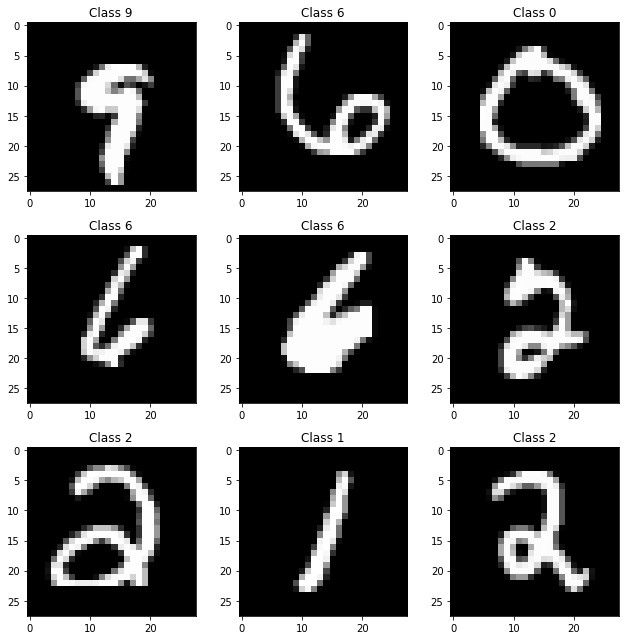

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=",")
        print("")

# now print!        
matprint(X_train[num])

0,0,0,0,0,0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,  0,  3, 13, 47,173,253,253,253,249,122,  5,  0,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0, 16,126,252,252,252,252,252,252,253,252,164,  0,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,157,252,252,224,175, 96, 96,153,236,252,238, 52,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0,17,221,220, 84, 20,  0,  0,  0,  0, 52,252,252, 84,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 7,146, 98,  0,  0,  0,  0,  0,  0, 13,252,252, 84,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,252,252, 84,  0,  0,  0,  0, 0,0,0,0,0,
0,0,0,0,0,0, 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,252,252, 84,  0,  0,  0,  0, 0,0,0,0,0,

In [ ]:
number28 = np.array([0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0, 35,130,255,199,146, 59, 18,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0, 15,114,248,253,253,253,253,253,205, 57,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  8,187,253,253,225,139,139,165,250,253,218, 24,  1,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,120,253,253,154,  0,  0,  0,  0, 40,229,253,253, 23,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,154,253,154,  6,  0,  0,  0,  0,  0, 93,228,253,194,0,0,0,0,0,0,
0,0,0,0,0,0,  1, 11, 93,240,233, 39,  0,  0,  0,  0,  0,  0,  0,123,253,221,0,0,0,0,0,0,
0,0,0,0,0,0, 94,253,253,212,253,220, 34,  0,  0,  0,  0,  0,  0, 86,253,200,0,0,0,0,0,0,
0,0,0,0,0,0,222,253,108,  9, 80,167,168,  0,  0,  0,  0,  0,105,235,253, 76,0,0,0,0,0,0,
0,0,0,0,0,0,215,253,157, 74,  7,  0,  9,  0,  0,  0,  0, 55,240,249,147,  3,0,0,0,0,0,0,
0,0,0,0,0,0, 45,253,253,253,197, 80,  5,  0,  0,  0, 62,236,253,165,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  2, 72,230,253,253,253,198, 73,  0, 57,235,253,193, 17,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0, 12, 67,103, 99,224,250,238,246,253,236, 62,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  6,193,253,253,253, 48,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0, 14,236,253,253,253,128,  4,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0, 10,180,253,204,128,233,253,172,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,115,253,240, 74,  0, 19,221,245, 83,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,195,253,199,  0,  0,  0, 35,201,243, 36,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,195,253,107,  0,  0,  8, 33,197,245, 37,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,195,253,237,179,179,196,253,253,188,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0, 29,136,214,253,253,253,253,195, 62,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0])

In [ ]:
from skimage.transform import resize
t = number28.reshape(28,28)
print(t.shape)
number112 = resize(t, (112, 112))
print(number112.dtype)
"""
for i in range(0,112):
  for j in range(0,112):
    if number112[i][j] < 10e-20:
      number112[i][j] = 0
      /
"""
for i in range(0,112):
  for j in range(0,112):
      number112[i][j] = number112[i][j] * 10e+19
      if number112[i][j] < 10:
       number112[i][j] = 0
    
np.amax(number112)
number112 = number112 /12
np.amax(number112)

(28, 28)
float64


229.0377089375628

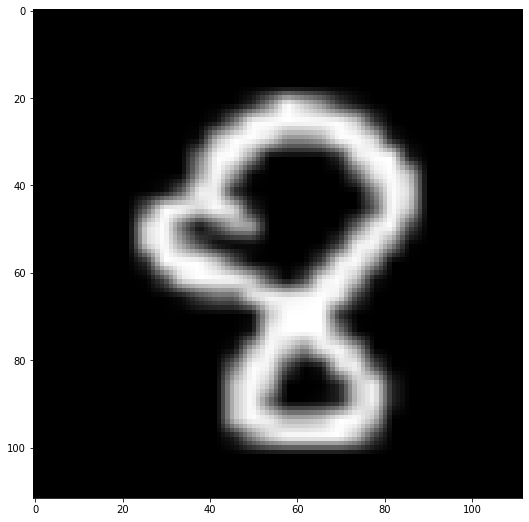

In [ ]:
plt.imshow(number112, cmap='gray', interpolation='none')

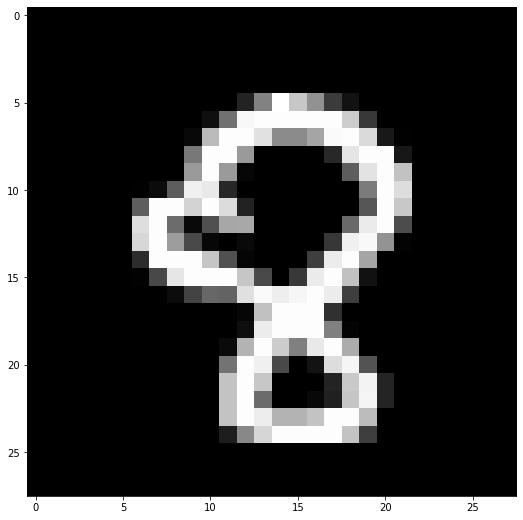

In [ ]:
plt.imshow(t, cmap='gray', interpolation='none')

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=",")
        print("")

# now print!        
matprint(number112)

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,      0,       0,       0,       0,      0,       0,      0,      0,       0,       0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,       0,       0,      0,      0,       0,      0,      0,      0,      0,       0,      0,       0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,       0,      0,       0,       0,      0,      0,      0,      0,      0,      0,      0,       0,       0,       0,      0,       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,      0,       0,       0,       0,      0,       0,      0,      0,       0,       0,      0,      0,      0,      0,      0,      0,      0,      0,      0,      0,       0,       0,      0,      0,       0,      0,      0,      0,      0,       0,      0,       0,      0,      0,      0,      0,      

In [ ]:
number112.shape

(112, 112)

In [ ]:
number28new = np.array( [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 23, 20, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 49, 143, 223, 196, 149, 73, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 126, 228, 252, 257, 252, 248, 242, 193, 67, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 176, 247, 254, 213, 156, 149, 175, 236, 256, 204, 53, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 119, 246, 248, 156, 34, 15, 14, 18, 69, 216, 259, 221, 50, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 21, 166, 246, 160, 25, 0, 0, 0, 0, 4, 107, 225, 259, 177, 14, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 4, 31, 115, 229, 234, 86, 0, 0, 0, 0, 0, 0, 13, 142, 252, 209, 21, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 3, 107, 223, 230, 214, 237, 192, 50, 0, 0, 0, 0, 0, 8, 124, 245, 186, 19, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 20, 201, 251, 147, 44, 95, 154, 127, 7, 0, 0, 0, 4, 116, 224, 235, 91, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 19, 192, 254, 178, 89, 25, 16, 13, 0, 0, 0, 4, 80, 224, 242, 149, 10, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 67, 227, 256, 244, 190, 94, 25, 0, 0, 4, 82, 218, 248, 163, 21, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 4, 91, 210, 245, 244, 227, 184, 90, 30, 84, 219, 256, 188, 38, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 3, 28, 76, 114, 127, 201, 234, 231, 244, 263, 218, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 47, 205, 266, 273, 250, 92, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 227, 264, 260, 253, 145, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 173, 251, 208, 158, 218, 239, 163, 18, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 120, 245, 236, 92, 17, 52, 201, 227, 98, 4, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 184, 256, 192, 24, 0, 0, 65, 205, 213, 40, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 192, 250, 146, 28, 18, 22, 70, 206, 225, 42, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 173, 247, 232, 186, 181, 199, 240, 249, 178, 19, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 140, 201, 226, 230, 232, 233, 184, 65, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 21, 25, 25, 25, 25, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

])

number28new = number28new.reshape(28,28)
for i in range(0,28):
  for j in range(0,28):
      if number28new[i][j] < 35:
       number28new[i][j] = 0



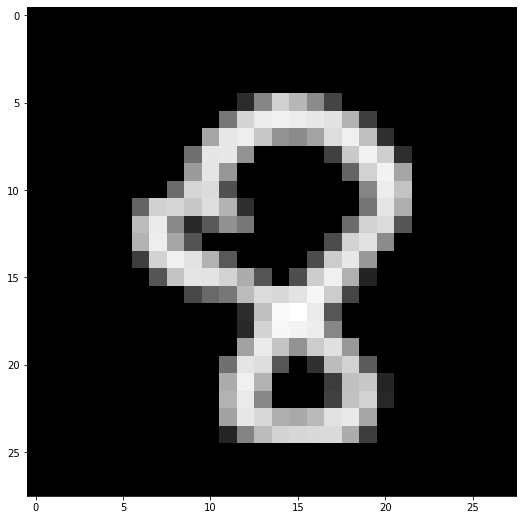

In [ ]:
plt.imshow(number28new, cmap='gray', interpolation='none')

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=",")
        print("")

# now print!        
matprint(number28new)

0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,  0, 49,143,223,196,149, 73,  0,  0,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,  0,126,228,252,257,252,248,242,193, 67,  0,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,  0,176,247,254,213,156,149,175,236,256,204, 53,  0,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,119,246,248,156,  0,  0,  0,  0, 69,216,259,221, 50,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,  0,166,246,160,  0,  0,  0,  0,  0,  0,107,225,259,177,0,0,0,0,0,0,
0,0,0,0,0,0,  0,  0,115,229,234, 86,  0,  0,  0,  0,  0,  0,  0,142,252,209,0,0,0,0,0,0,
0,0,0,0,0,0,107,223,2

In [ ]:
crop_test = np.array([116, 141, 144, 139, 133, 126, 126, 120, 113, 131, 138, 124, 118, 109, 136, 127, 114, 141, 116, 147, 144, 131, 135, 132, 84, 81, 95, 103, 
154, 142, 153, 123, 129, 112, 137, 111, 114, 120, 123, 122, 118, 122, 137, 120, 125, 119, 114, 119, 131, 105, 125, 181, 128, 132, 97, 130, 
154, 137, 111, 126, 116, 128, 130, 118, 119, 124, 110, 118, 127, 108, 131, 105, 109, 112, 119, 119, 110, 102, 113, 144, 150, 140, 132, 130, 
157, 133, 128, 136, 133, 125, 105, 106, 121, 110, 122, 121, 127, 136, 129, 116, 110, 136, 120, 128, 132, 122, 135, 132, 139, 152, 127, 113, 
124, 128, 129, 135, 129, 117, 109, 105, 104, 108, 135, 123, 141, 139, 121, 121, 122, 129, 133, 124, 109, 110, 124, 129, 127, 119, 137, 139, 
131, 128, 129, 130, 128, 131, 110, 116, 105, 130, 116, 144, 148, 116, 114, 114, 122, 134, 135, 121, 126, 131, 114, 113, 124, 136, 141, 152, 
127, 129, 123, 136, 134, 127, 121, 109, 125, 121, 140, 154, 123, 114, 117, 126, 143, 137, 118, 114, 141, 121, 118, 138, 136, 146, 145, 137, 
126, 119, 127, 119, 124, 115, 110, 128, 111, 139, 143, 133, 108, 122, 115, 136, 148, 126, 112, 118, 139, 142, 144, 143, 154, 143, 120, 121, 
138, 131, 124, 135, 118, 119, 128, 118, 137, 153, 124, 113, 115, 128, 145, 148, 130, 119, 119, 121, 136, 165, 151, 132, 121, 121, 132, 143, 
132, 123, 119, 126, 141, 149, 119, 137, 142, 123, 124, 134, 119, 145, 157, 127, 115, 122, 132, 148, 165, 166, 131, 133, 117, 113, 122, 137, 
123, 124, 108, 109, 115, 120, 145, 147, 128, 120, 116, 120, 158, 174, 132, 119, 127, 125, 160, 168, 158, 135, 125, 109, 107, 122, 117, 141, 
118, 116, 106, 99, 113, 117, 123, 131, 118, 138, 120, 141, 185, 147, 119, 139, 134, 152, 171, 157, 123, 113, 99, 105, 106, 125, 146, 182, 
110, 113, 108, 109, 104, 111, 123, 115, 119, 132, 150, 162, 151, 104, 112, 129, 157, 159, 155, 120, 102, 102, 112, 104, 150, 176, 188, 181, 
120, 114, 108, 106, 109, 108, 113, 129, 134, 149, 174, 120, 119, 114, 116, 143, 171, 148, 119, 114, 102, 114, 125, 137, 175, 175, 138, 131, 
98, 89, 95, 92, 93, 95, 97, 113, 121, 138, 147, 112, 114, 120, 131, 153, 154, 134, 119, 97, 102, 150, 155, 177, 170, 118, 114, 99, 
95, 96, 91, 76, 96, 92, 84, 88, 111, 115, 110, 105, 104, 119, 159, 155, 137, 125, 109, 103, 121, 145, 171, 172, 147, 112, 144, 137, 
96, 93, 89, 82, 92, 94, 91, 102, 110, 124, 115, 104, 105, 139, 168, 155, 124, 115, 95, 89, 106, 165, 173, 153, 126, 107, 172, 202, 
103, 96, 88, 90, 101, 103, 103, 98, 101, 109, 125, 108, 128, 176, 168, 137, 103, 104, 107, 113, 141, 165, 191, 163, 123, 122, 150, 186, 
95, 87, 85, 85, 89, 92, 90, 95, 99, 102, 97, 109, 166, 189, 154, 114, 105, 106, 124, 130, 111, 183, 199, 179, 155, 125, 126, 113, 
93, 92, 94, 92, 73, 93, 97, 125, 89, 91, 110, 136, 180, 193, 141, 107, 99, 118, 166, 144, 108, 177, 197, 173, 179, 173, 125, 110, 
96, 91, 94, 84, 78, 76, 83, 77, 81, 91, 108, 140, 191, 189, 122, 111, 107, 137, 180, 125, 103, 176, 190, 169, 179, 193, 193, 191, 
102, 99, 90, 93, 84, 83, 82, 87, 91, 101, 129, 149, 189, 151, 113, 92, 124, 158, 185, 122, 115, 159, 164, 150, 158, 177, 182, 176, 
97, 106, 104, 81, 76, 97, 93, 93, 102, 97, 127, 190, 199, 118, 94, 110, 145, 191, 195, 145, 130, 172, 181, 184, 193, 194, 193, 192, 
122, 117, 126, 110, 113, 108, 118, 129, 132, 129, 128, 159, 158, 112, 97, 125, 149, 157, 162, 129, 138, 146, 139, 148, 147, 142, 141, 149, 
121, 122, 117, 115, 102, 113, 122, 131, 140, 106, 164, 185, 148, 132, 117, 133, 167, 158, 173, 122, 137, 165, 173, 161, 160, 168, 160, 177, 
95, 112, 108, 97, 105, 107, 106, 112, 111, 116, 167, 197, 141, 108, 119, 130, 194, 174, 199, 129, 129, 190, 197, 185, 181, 190, 192, 187, 
129, 129, 138, 130, 128, 130, 132, 119, 132, 137, 135, 157, 124, 118, 123, 160, 174, 153, 175, 105, 128, 175, 152, 118, 139, 152, 147, 121, 
108, 102, 103, 102, 109, 105, 117, 130, 151, 160, 177, 191, 131, 109, 103, 173, 189, 190, 167, 91, 111, 205, 197, 176, 190, 205, 203, 122])

In [ ]:
crop_test = crop_test.reshape(28,28)

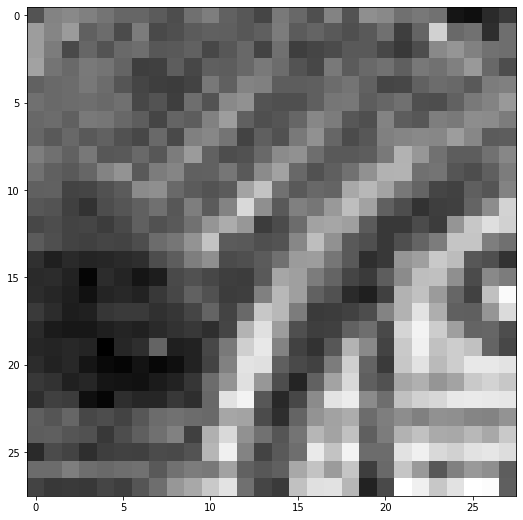

In [ ]:
plt.imshow(crop_test, cmap='gray', interpolation='none')

In [ ]:
crop_big = np.array([84, 156, 156, 156, 124, 156, 156, 145, 145, 105, 134, 134, 124, 124, 124, 134, 134, 113, 124, 124, 113, 102, 156, 126, 202, 101, 124, 116, 128, 170, 162, 152, 141, 152, 110, 110, 164, 142, 110, 132, 132, 132, 132, 132, 132, 110, 100, 152, 141, 170, 106, 126, 62, 120, 102, 113, 156, 113, 116, 117, 181, 90, 102, 105, 105, 64, 64, 32, 84, 185, 109, 137, 62, 145, 156, 134, 134, 134, 166, 134, 134, 145, 145, 124, 124, 134, 134, 113, 145, 145, 156, 105, 137, 158, 128, 118, 129, 66, 88, 88, 88, 77, 77, 88, 88, 98, 109, 109, 98, 77, 77, 140, 
156, 84, 84, 84, 134, 145, 145, 145, 145, 156, 134, 145, 145, 145, 134, 124, 134, 124, 124, 124, 124, 166, 130, 192, 70, 145, 137, 117, 141, 130, 100, 89, 89, 89, 152, 100, 110, 132, 132, 142, 142, 142, 142, 132, 132, 110, 100, 152, 120, 128, 64, 73, 121, 105, 60, 113, 124, 116, 160, 162, 124, 84, 105, 106, 160, 98, 141, 109, 170, 126, 174, 88, 94, 137, 156, 156, 134, 156, 134, 134, 156, 145, 145, 124, 124, 134, 134, 145, 145, 134, 134, 105, 126, 158, 106, 129, 129, 77, 88, 88, 77, 77, 77, 88, 88, 77, 98, 98, 77, 98, 88, 129, 
156, 84, 156, 94, 134, 124, 145, 156, 156, 145, 145, 145, 145, 156, 156, 134, 134, 134, 134, 134, 145, 209, 45, 49, 113, 126, 117, 130, 100, 100, 110, 110, 110, 100, 121, 100, 100, 132, 132, 142, 142, 142, 142, 142, 132, 110, 100, 141, 128, 74, 73, 142, 116, 92, 156, 94, 126, 138, 224, 102, 177, 126, 152, 162, 142, 132, 132, 184, 162, 170, 116, 173, 138, 124, 84, 156, 124, 145, 145, 156, 156, 84, 156, 134, 134, 134, 134, 156, 145, 105, 94, 148, 169, 117, 117, 56, 66, 88, 88, 77, 77, 77, 77, 77, 77, 88, 88, 88, 88, 129, 129, 77, 
116, 84, 84, 124, 156, 124, 134, 145, 145, 166, 166, 145, 73, 177, 177, 156, 156, 134, 145, 156, 137, 66, 101, 156, 137, 117, 170, 100, 100, 110, 110, 110, 110, 110, 110, 110, 132, 132, 132, 142, 142, 142, 142, 142, 100, 110, 141, 170, 85, 126, 174, 160, 92, 124, 145, 137, 160, 124, 124, 116, 96, 149, 142, 132, 132, 121, 110, 110, 110, 152, 126, 174, 66, 94, 73, 94, 166, 166, 166, 166, 166, 188, 156, 156, 84, 94, 166, 166, 105, 177, 177, 148, 169, 190, 190, 56, 56, 77, 77, 77, 77, 88, 88, 88, 88, 140, 98, 98, 88, 88, 140, 140, 
94, 156, 156, 177, 145, 156, 156, 73, 145, 177, 177, 137, 166, 94, 105, 177, 156, 166, 166, 166, 117, 181, 60, 84, 96, 141, 110, 100, 100, 110, 100, 110, 110, 110, 110, 110, 110, 132, 132, 132, 142, 142, 142, 110, 100, 162, 130, 149, 106, 62, 98, 145, 134, 166, 105, 160, 130, 124, 105, 149, 130, 110, 110, 110, 132, 142, 110, 121, 100, 141, 85, 137, 98, 137, 84, 94, 94, 94, 94, 166, 126, 156, 156, 94, 94, 73, 73, 84, 105, 105, 116, 158, 158, 190, 190, 201, 129, 140, 140, 88, 88, 88, 98, 88, 150, 88, 98, 88, 88, 77, 77, 150, 
126, 177, 177, 177, 156, 145, 145, 145, 156, 177, 177, 166, 148, 126, 116, 105, 166, 105, 105, 177, 128, 152, 113, 105, 181, 162, 162, 100, 100, 110, 110, 110, 100, 100, 100, 100, 100, 100, 110, 110, 110, 110, 110, 100, 152, 109, 128, 74, 105, 194, 137, 96, 84, 105, 96, 192, 81, 126, 149, 162, 162, 121, 110, 110, 121, 110, 110, 121, 109, 170, 106, 73, 132, 105, 73, 105, 116, 126, 126, 94, 94, 126, 105, 84, 62, 94, 94, 105, 105, 116, 116, 126, 158, 201, 201, 201, 201, 150, 98, 98, 161, 161, 161, 98, 98, 98, 88, 77, 98, 150, 150, 109, 
166, 156, 145, 145, 145, 145, 145, 145, 145, 156, 84, 169, 116, 105, 105, 116, 145, 105, 105, 148, 88, 122, 177, 85, 152, 162, 162, 100, 100, 78, 100, 110, 89, 100, 100, 100, 100, 100, 110, 100, 100, 100, 141, 109, 170, 138, 85, 126, 102, 117, 41, 166, 166, 117, 120, 60, 166, 85, 224, 152, 152, 121, 121, 100, 100, 100, 78, 141, 98, 138, 126, 92, 180, 73, 116, 116, 116, 116, 116, 116, 116, 116, 137, 180, 126, 116, 116, 126, 105, 116, 116, 180, 212, 169, 212, 129, 140, 161, 161, 172, 172, 161, 109, 161, 161, 130, 58, 26, 161, 161, 172, 150, 
166, 156, 156, 145, 145, 134, 134, 166, 166, 145, 116, 166, 166, 156, 84, 84, 62, 73, 73, 148, 66, 60, 105, 149, 130, 152, 152, 141, 130, 141, 141, 141, 141, 162, 152, 152, 152, 152, 141, 141, 130, 130, 170, 128, 85, 137, 126, 92, 106, 94, 158, 169, 149, 69, 81, 156, 85, 170, 141, 152, 152, 89, 89, 141, 162, 162, 141, 149, 96, 105, 194, 138, 137, 137, 126, 126, 126, 148, 149, 109, 109, 181, 181, 149, 158, 126, 116, 126, 116, 126, 137, 158, 180, 201, 201, 97, 98, 161, 26, 100, 89, 161, 161, 161, 161, 109, 37, 98, 88, 150, 150, 161, 
166, 156, 156, 145, 145, 145, 145, 156, 156, 145, 94, 177, 177, 145, 116, 84, 73, 134, 105, 149, 80, 124, 126, 181, 120, 152, 141, 141, 141, 130, 141, 141, 141, 152, 152, 141, 141, 152, 141, 141, 120, 149, 96, 64, 94, 164, 109, 94, 84, 134, 105, 180, 37, 81, 62, 116, 106, 181, 141, 141, 141, 78, 78, 141, 130, 170, 117, 85, 94, 162, 158, 84, 134, 84, 126, 105, 126, 158, 170, 109, 80, 101, 152, 109, 106, 94, 84, 62, 94, 94, 84, 116, 116, 126, 180, 180, 180, 129, 129, 129, 129, 129, 108, 129, 129, 118, 140, 66, 129, 129, 140, 150, 
166, 156, 156, 145, 134, 134, 124, 134, 134, 145, 73, 73, 73, 145, 94, 94, 124, 124, 94, 106, 69, 145, 137, 170, 141, 141, 141, 141, 141, 130, 141, 141, 141, 141, 141, 152, 141, 152, 141, 130, 98, 128, 74, 62, 153, 109, 94, 134, 134, 126, 149, 80, 81, 126, 117, 138, 181, 152, 152, 78, 89, 89, 89, 130, 141, 138, 74, 116, 153, 138, 62, 145, 73, 177, 177, 94, 148, 69, 92, 124, 94, 84, 105, 134, 110, 109, 85, 94, 94, 145, 145, 137, 137, 116, 137, 148, 169, 118, 118, 108, 108, 180, 108, 118, 129, 140, 140, 140, 129, 129, 129, 140, 
166, 156, 166, 166, 124, 92, 134, 134, 134, 145, 73, 73, 134, 134, 124, 124, 134, 124, 94, 117, 112, 156, 106, 130, 152, 141, 141, 141, 141, 141, 78, 89, 89, 89, 89, 100, 100, 100, 78, 130, 170, 106, 94, 153, 106, 84, 124, 166, 166, 158, 202, 81, 94, 64, 170, 141, 162, 89, 100, 132, 100, 89, 141, 109, 138, 85, 53, 41, 120, 84, 70, 134, 124, 166, 116, 149, 81, 113, 137, 74, 128, 106, 96, 64, 62, 164, 85, 94, 94, 84, 84, 126, 148, 148, 126, 158, 126, 180, 180, 180, 180, 108, 108, 190, 129, 118, 118, 108, 118, 118, 56, 129, 
116, 166, 134, 156, 156, 145, 145, 145, 145, 73, 73, 73, 145, 145, 145, 145, 134, 113, 94, 149, 38, 126, 192, 162, 100, 100, 100, 89, 78, 89, 89, 89, 89, 89, 110, 100, 100, 110, 100, 130, 128, 74, 73, 173, 73, 124, 124, 148, 117, 120, 81, 116, 96, 181, 121, 110, 110, 121, 121, 132, 132, 89, 78, 109, 160, 74, 105, 132, 85, 73, 102, 134, 74, 96, 149, 60, 113, 94, 106, 202, 110, 132, 132, 141, 117, 134, 141, 105, 102, 145, 145, 134, 156, 166, 126, 137, 137, 169, 169, 180, 158, 158, 158, 180, 180, 169, 169, 128, 180, 180, 117, 117, 
166, 134, 156, 156, 156, 134, 134, 134, 145, 145, 73, 73, 73, 145, 145, 145, 145, 113, 138, 106, 60, 126, 202, 100, 100, 100, 89, 89, 89, 110, 110, 121, 132, 132, 132, 100, 100, 121, 162, 98, 106, 64, 134, 170, 124, 113, 94, 126, 149, 38, 177, 117, 152, 110, 142, 142, 142, 142, 132, 132, 110, 89, 120, 149, 96, 94, 164, 149, 134, 102, 102, 145, 85, 181, 60, 113, 64, 149, 141, 110, 110, 142, 142, 121, 152, 64, 132, 85, 134, 134, 134, 156, 156, 94, 158, 105, 105, 137, 158, 169, 169, 128, 190, 158, 158, 169, 169, 106, 149, 160, 160, 58, 
177, 177, 166, 134, 134, 134, 134, 134, 145, 124, 134, 145, 166, 145, 145, 134, 134, 113, 166, 138, 92, 126, 202, 110, 110, 121, 121, 100, 100, 89, 110, 132, 132, 132, 132, 100, 89, 152, 98, 128, 106, 116, 130, 113, 92, 145, 198, 170, 81, 166, 74, 181, 121, 142, 121, 142, 142, 142, 121, 121, 89, 141, 160, 74, 105, 132, 98, 102, 113, 145, 198, 117, 224, 92, 84, 116, 170, 152, 110, 142, 142, 142, 142, 110, 152, 106, 196, 117, 102, 134, 134, 124, 145, 166, 105, 105, 137, 148, 148, 158, 158, 148, 148, 169, 169, 169, 106, 128, 98, 69, 70, 134, 
105, 177, 177, 145, 134, 113, 145, 145, 145, 124, 156, 145, 166, 145, 145, 166, 137, 124, 94, 141, 145, 64, 224, 100, 110, 100, 121, 100, 100, 89, 100, 121, 121, 132, 132, 100, 130, 98, 117, 53, 84, 130, 84, 134, 145, 74, 181, 28, 145, 64, 213, 100, 142, 132, 132, 132, 132, 132, 132, 89, 120, 170, 64, 73, 152, 74, 60, 134, 156, 177, 128, 224, 102, 116, 117, 181, 152, 132, 121, 132, 142, 142, 132, 142, 141, 117, 134, 96, 113, 156, 156, 145, 145, 166, 94, 105, 126, 137, 137, 137, 158, 158, 148, 169, 169, 106, 98, 122, 102, 134, 94, 137, 
188, 177, 134, 145, 145, 134, 113, 113, 113, 145, 134, 113, 113, 94, 134, 124, 113, 188, 128, 152, 113, 85, 162, 89, 100, 132, 100, 100, 89, 100, 100, 142, 142, 110, 89, 130, 160, 117, 64, 84, 192, 105, 113, 177, 177, 128, 38, 113, 85, 170, 142, 132, 153, 142, 142, 142, 132, 132, 110, 141, 160, 64, 156, 132, 62, 113, 92, 145, 177, 117, 28, 124, 85, 128, 141, 110, 110, 110, 121, 142, 142, 142, 132, 89, 160, 85, 164, 64, 113, 145, 145, 145, 145, 166, 166, 94, 116, 126, 137, 148, 169, 158, 148, 56, 80, 80, 102, 105, 148, 85, 96, 128, 
177, 94, 116, 145, 145, 113, 113, 113, 113, 102, 113, 156, 156, 124, 124, 156, 113, 64, 138, 49, 64, 106, 100, 100, 100, 110, 110, 89, 89, 110, 121, 132, 110, 89, 78, 98, 117, 74, 134, 130, 134, 134, 145, 188, 117, 28, 134, 116, 170, 89, 142, 142, 142, 153, 142, 153, 132, 110, 78, 128, 117, 84, 173, 148, 102, 134, 156, 105, 181, 81, 188, 64, 100, 152, 100, 110, 132, 132, 142, 142, 142, 142, 89, 130, 117, 105, 152, 84, 84, 145, 145, 145, 145, 145, 94, 156, 105, 105, 148, 158, 116, 137, 149, 122, 102, 156, 137, 137, 128, 181, 152, 121, 
188, 94, 94, 124, 124, 124, 134, 134, 134, 124, 124, 134, 134, 124, 124, 156, 166, 96, 202, 124, 74, 160, 100, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 89, 98, 128, 74, 134, 120, 145, 92, 134, 188, 85, 152, 145, 116, 138, 132, 121, 153, 142, 142, 164, 142, 132, 132, 152, 170, 74, 126, 184, 137, 113, 92, 134, 188, 117, 90, 145, 96, 138, 132, 110, 153, 142, 142, 142, 110, 100, 89, 89, 170, 138, 53, 132, 106, 49, 102, 145, 145, 145, 156, 134, 94, 94, 116, 126, 126, 169, 130, 73, 180, 52, 126, 96, 138, 181, 110, 121, 121, 110, 
105, 105, 105, 134, 134, 134, 134, 134, 134, 145, 145, 134, 134, 134, 156, 124, 116, 170, 112, 156, 149, 141, 110, 110, 110, 110, 110, 110, 110, 100, 100, 110, 89, 109, 117, 64, 94, 152, 64, 81, 145, 156, 85, 124, 81, 116, 170, 100, 153, 142, 153, 142, 142, 142, 132, 142, 100, 141, 128, 94, 164, 117, 102, 102, 134, 188, 128, 17, 145, 85, 224, 100, 153, 132, 142, 132, 142, 132, 100, 100, 89, 121, 98, 116, 153, 117, 124, 113, 102, 102, 113, 113, 145, 156, 84, 166, 105, 106, 130, 112, 113, 124, 156, 64, 138, 170, 162, 132, 132, 153, 153, 153, 
105, 156, 105, 145, 134, 134, 134, 124, 124, 113, 145, 124, 124, 113, 124, 156, 96, 202, 81, 188, 181, 152, 110, 110, 110, 132, 110, 110, 110, 89, 89, 89, 130, 170, 64, 134, 121, 137, 102, 53, 177, 149, 97, 134, 198, 106, 162, 100, 142, 142, 142, 164, 142, 132, 132, 100, 120, 138, 64, 185, 96, 92, 70, 124, 116, 128, 49, 166, 106, 181, 121, 121, 153, 142, 142, 142, 142, 100, 89, 152, 138, 85, 53, 62, 138, 84, 113, 134, 180, 73, 134, 124, 124, 156, 105, 116, 128, 202, 60, 145, 116, 74, 138, 162, 121, 132, 132, 142, 142, 153, 153, 153, 
166, 105, 134, 134, 124, 134, 124, 145, 145, 145, 124, 134, 134, 166, 94, 166, 160, 80, 156, 74, 213, 100, 132, 121, 110, 110, 100, 100, 110, 100, 152, 141, 128, 85, 94, 164, 116, 102, 134, 188, 85, 224, 81, 116, 96, 109, 132, 153, 153, 164, 164, 142, 142, 142, 100, 130, 149, 85, 174, 117, 124, 92, 105, 137, 149, 173, 94, 64, 170, 100, 132, 132, 142, 142, 142, 142, 142, 100, 141, 120, 96, 137, 62, 149, 52, 124, 84, 156, 102, 102, 113, 145, 113, 145, 53, 138, 101, 134, 126, 85, 192, 141, 121, 121, 121, 110, 153, 153, 153, 153, 153, 174, 
124, 134, 134, 134, 134, 124, 124, 134, 134, 102, 145, 134, 124, 124, 94, 126, 181, 92, 126, 117, 141, 110, 132, 142, 121, 110, 110, 89, 89, 141, 98, 170, 85, 73, 142, 85, 102, 134, 145, 74, 181, 49, 84, 85, 152, 121, 142, 153, 153, 164, 164, 132, 142, 89, 130, 149, 74, 84, 120, 84, 102, 134, 126, 85, 162, 102, 74, 170, 110, 153, 132, 142, 142, 142, 142, 121, 100, 162, 88, 128, 116, 174, 109, 134, 102, 156, 156, 145, 134, 156, 145, 145, 188, 128, 80, 81, 134, 85, 138, 130, 132, 132, 132, 121, 121, 132, 153, 142, 142, 153, 153, 153, 
134, 134, 134, 134, 134, 134, 134, 92, 94, 134, 134, 134, 134, 134, 156, 106, 101, 145, 126, 152, 121, 110, 121, 142, 132, 110, 110, 89, 152, 98, 117, 85, 116, 66, 158, 49, 134, 145, 64, 128, 94, 52, 148, 213, 153, 153, 164, 174, 174, 142, 142, 100, 100, 130, 160, 74, 94, 109, 124, 124, 166, 64, 170, 81, 105, 64, 192, 89, 110, 132, 142, 142, 142, 142, 142, 100, 89, 141, 117, 105, 185, 138, 113, 102, 145, 145, 145, 156, 84, 145, 145, 53, 160, 28, 102, 116, 85, 109, 162, 121, 132, 132, 132, 153, 153, 142, 142, 142, 142, 153, 153, 153, 
124, 124, 124, 134, 134, 134, 134, 113, 124, 113, 124, 145, 145, 145, 116, 117, 81, 188, 128, 152, 121, 110, 153, 132, 110, 110, 142, 109, 138, 117, 74, 84, 121, 137, 60, 124, 145, 126, 192, 162, 102, 106, 140, 110, 132, 153, 174, 153, 153, 142, 142, 152, 130, 117, 74, 62, 152, 94, 102, 145, 116, 138, 28, 156, 96, 170, 121, 142, 142, 132, 132, 142, 142, 142, 142, 100, 130, 160, 64, 153, 149, 92, 145, 124, 124, 134, 134, 145, 113, 105, 128, 17, 81, 156, 126, 128, 213, 110, 132, 121, 121, 142, 142, 142, 142, 153, 153, 153, 153, 153, 153, 153, 
134, 124, 124, 134, 134, 134, 124, 124, 124, 113, 113, 124, 145, 145, 126, 138, 124, 126, 213, 100, 132, 142, 142, 142, 89, 89, 130, 149, 128, 126, 62, 205, 158, 145, 92, 145, 188, 117, 28, 145, 74, 181, 110, 142, 142, 142, 174, 153, 153, 153, 121, 130, 160, 74, 116, 120, 84, 156, 156, 64, 128, 152, 145, 53, 213, 162, 132, 142, 142, 132, 132, 142, 142, 142, 100, 152, 160, 64, 196, 141, 84, 113, 156, 134, 113, 113, 145, 114, 117, 162, 49, 84, 137, 138, 162, 162, 132, 110, 142, 142, 142, 153, 142, 142, 142, 153, 153, 153, 153, 153, 153, 142, 
124, 124, 134, 134, 124, 134, 134, 134, 134, 124, 124, 124, 124, 156, 116, 192, 156, 85, 173, 121, 132, 142, 142, 142, 89, 141, 149, 85, 105, 113, 152, 94, 92, 145, 166, 85, 138, 38, 134, 53, 181, 100, 121, 142, 142, 174, 174, 142, 110, 89, 141, 160, 74, 113, 120, 62, 113, 134, 177, 106, 100, 156, 106, 162, 110, 142, 142, 142, 142, 142, 142, 142, 142, 142, 89, 170, 96, 73, 109, 84, 92, 156, 156, 134, 124, 145, 64, 149, 89, 124, 105, 117, 213, 152, 162, 89, 100, 132, 142, 142, 142, 153, 153, 142, 153, 142, 153, 142, 142, 142, 142, 132, 
124, 124, 102, 124, 124, 134, 145, 124, 134, 113, 113, 134, 134, 166, 96, 90, 156, 117, 110, 132, 132, 142, 100, 100, 141, 98, 128, 126, 73, 98, 105, 60, 156, 156, 116, 138, 152, 134, 74, 170, 162, 153, 153, 142, 153, 174, 174, 142, 110, 130, 128, 106, 134, 170, 113, 113, 73, 105, 128, 162, 124, 74, 170, 110, 110, 132, 153, 132, 132, 142, 142, 132, 132, 89, 120, 74, 94, 120, 62, 102, 145, 145, 145, 156, 145, 53, 213, 60, 177, 85, 138, 141, 110, 121, 121, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 100, 152, 
156, 134, 113, 134, 124, 134, 134, 113, 134, 124, 113, 124, 113, 166, 148, 130, 166, 128, 121, 121, 121, 110, 110, 110, 109, 117, 126, 174, 98, 102, 102, 124, 124, 126, 85, 80, 102, 126, 181, 162, 121, 153, 153, 153, 142, 142, 142, 164, 152, 160, 64, 62, 98, 94, 134, 134, 105, 149, 70, 94, 74, 181, 132, 153, 153, 142, 153, 142, 142, 142, 142, 110, 89, 98, 117, 94, 174, 126, 73, 156, 156, 166, 166, 156, 149, 80, 156, 116, 128, 152, 100, 121, 121, 121, 121, 142, 142, 142, 142, 153, 153, 153, 153, 142, 142, 142, 142, 142, 110, 152, 98, 149, 
134, 134, 134, 124, 124, 134, 134, 134, 145, 124, 113, 124, 113, 85, 126, 98, 166, 149, 49, 121, 110, 100, 152, 141, 117, 137, 62, 120, 126, 81, 134, 124, 156, 85, 90, 102, 126, 138, 121, 121, 142, 142, 142, 142, 142, 153, 121, 152, 138, 74, 134, 160, 113, 102, 124, 124, 117, 213, 113, 32, 160, 100, 153, 132, 153, 142, 153, 142, 142, 142, 142, 152, 98, 106, 53, 152, 105, 92, 145, 177, 145, 198, 126, 224, 81, 166, 96, 160, 152, 110, 110, 142, 142, 142, 142, 142, 142, 142, 164, 174, 142, 164, 142, 142, 142, 142, 132, 162, 120, 149, 117, 126, 
134, 124, 124, 124, 124, 124, 124, 134, 134, 124, 166, 113, 145, 156, 64, 88, 70, 74, 234, 110, 110, 152, 138, 128, 116, 134, 152, 84, 102, 156, 134, 145, 117, 109, 124, 116, 138, 162, 132, 142, 153, 153, 142, 142, 142, 100, 120, 138, 53, 62, 152, 116, 113, 145, 116, 96, 28, 92, 106, 130, 121, 142, 121, 142, 142, 142, 142, 142, 142, 142, 110, 88, 138, 116, 121, 126, 92, 96, 84, 124, 124, 85, 192, 92, 188, 128, 213, 110, 164, 153, 153, 153, 153, 142, 142, 142, 142, 142, 142, 174, 153, 153, 153, 121, 110, 141, 120, 138, 106, 64, 94, 132, 
134, 113, 113, 124, 124, 113, 113, 124, 124, 145, 145, 102, 145, 145, 113, 96, 90, 166, 170, 120, 120, 149, 96, 85, 62, 109, 116, 124, 145, 134, 137, 64, 181, 38, 177, 106, 152, 121, 142, 142, 153, 153, 153, 153, 110, 120, 149, 128, 134, 170, 62, 113, 156, 124, 148, 181, 188, 53, 160, 162, 110, 142, 142, 142, 142, 164, 164, 142, 132, 110, 141, 128, 105, 121, 137, 102, 102, 81, 92, 96, 128, 120, 145, 85, 170, 121, 153, 153, 153, 153, 153, 142, 142, 142, 142, 153, 153, 164, 164, 153, 142, 153, 110, 152, 98, 160, 106, 74, 105, 173, 138, 177, 
134, 124, 124, 124, 113, 92, 92, 113, 134, 113, 113, 124, 124, 166, 156, 94, 112, 101, 137, 128, 96, 85, 126, 52, 120, 94, 81, 145, 156, 156, 94, 160, 60, 84, 96, 141, 110, 153, 153, 185, 153, 142, 142, 89, 152, 128, 74, 206, 98, 73, 102, 102, 134, 148, 49, 92, 74, 160, 110, 110, 132, 132, 153, 153, 174, 164, 132, 142, 100, 120, 117, 116, 174, 98, 60, 92, 145, 134, 145, 192, 192, 81, 126, 170, 110, 132, 153, 153, 153, 142, 142, 142, 142, 142, 142, 142, 164, 153, 142, 153, 153, 164, 152, 98, 106, 74, 62, 162, 106, 73, 124, 145, 
145, 145, 124, 134, 113, 124, 124, 113, 124, 124, 113, 134, 134, 134, 134, 102, 137, 74, 28, 166, 156, 52, 70, 80, 62, 134, 134, 156, 145, 148, 192, 49, 156, 96, 152, 132, 142, 153, 153, 153, 142, 142, 142, 89, 192, 74, 94, 141, 62, 105, 145, 134, 137, 192, 102, 64, 181, 100, 121, 142, 142, 132, 153, 153, 153, 142, 142, 110, 141, 109, 74, 185, 128, 92, 113, 113, 145, 128, 128, 110, 134, 85, 170, 152, 132, 164, 164, 153, 153, 164, 142, 142, 142, 142, 132, 142, 142, 153, 132, 110, 141, 98, 117, 116, 134, 173, 138, 170, 145, 145, 156, 156, 
145, 145, 145, 134, 134, 113, 156, 145, 134, 124, 124, 134, 145, 166, 156, 124, 134, 145, 85, 170, 160, 160, 116, 156, 166, 145, 134, 166, 166, 106, 130, 124, 85, 192, 92, 153, 153, 153, 153, 164, 142, 121, 78, 160, 106, 94, 109, 73, 124, 134, 124, 74, 152, 70, 116, 138, 110, 164, 153, 142, 142, 142, 153, 153, 142, 142, 142, 141, 128, 74, 164, 160, 92, 145, 145, 156, 64, 213, 124, 105, 128, 130, 121, 164, 164, 153, 164, 174, 174, 153, 153, 142, 142, 142, 132, 132, 132, 142, 110, 141, 160, 117, 105, 164, 162, 94, 113, 134, 134, 156, 145, 145, 
134, 134, 134, 134, 145, 134, 124, 124, 124, 124, 124, 124, 124, 124, 156, 134, 134, 124, 124, 124, 113, 124, 124, 145, 156, 124, 106, 84, 96, 60, 113, 74, 138, 152, 121, 153, 153, 164, 142, 142, 110, 89, 181, 64, 94, 142, 73, 145, 84, 177, 53, 181, 134, 166, 192, 121, 132, 153, 153, 153, 164, 153, 142, 142, 142, 100, 130, 128, 64, 116, 128, 92, 113, 145, 156, 96, 100, 156, 74, 128, 100, 100, 153, 142, 164, 153, 164, 185, 185, 153, 142, 142, 142, 132, 132, 121, 110, 141, 170, 74, 116, 102, 170, 116, 92, 124, 145, 156, 145, 124, 145, 148, 
134, 145, 145, 134, 134, 145, 134, 134, 124, 124, 124, 113, 124, 92, 166, 145, 145, 134, 113, 62, 62, 134, 134, 124, 124, 156, 84, 126, 160, 102, 94, 138, 121, 153, 153, 153, 153, 164, 142, 164, 152, 170, 106, 105, 173, 64, 92, 145, 145, 74, 181, 49, 106, 106, 100, 153, 153, 153, 153, 164, 164, 153, 142, 142, 142, 162, 98, 74, 134, 138, 92, 116, 124, 156, 106, 28, 134, 85, 121, 132, 142, 142, 153, 164, 164, 185, 185, 185, 164, 142, 142, 132, 132, 110, 100, 152, 170, 117, 53, 41, 73, 94, 102, 156, 113, 124, 124, 124, 145, 134, 113, 156, 
134, 145, 145, 134, 124, 124, 145, 124, 124, 113, 113, 124, 113, 124, 94, 113, 113, 124, 145, 134, 124, 124, 166, 148, 124, 145, 74, 160, 92, 105, 117, 141, 121, 153, 153, 153, 153, 153, 100, 89, 149, 85, 116, 184, 126, 102, 145, 134, 181, 202, 92, 105, 170, 130, 121, 153, 153, 164, 164, 153, 153, 142, 142, 142, 130, 128, 74, 62, 138, 92, 92, 102, 188, 149, 70, 177, 117, 141, 121, 142, 153, 153, 164, 164, 164, 185, 185, 174, 164, 142, 142, 132, 100, 162, 170, 160, 85, 126, 132, 117, 94, 70, 113, 124, 102, 102, 102, 134, 145, 134, 145, 156, 
134, 134, 124, 134, 134, 145, 102, 124, 124, 124, 124, 124, 124, 113, 124, 113, 124, 145, 156, 156, 145, 156, 156, 134, 156, 116, 170, 60, 188, 106, 141, 132, 132, 132, 153, 142, 142, 142, 89, 109, 117, 116, 120, 102, 102, 137, 166, 73, 138, 60, 42, 106, 89, 142, 153, 153, 153, 174, 164, 142, 142, 132, 100, 78, 149, 74, 62, 120, 102, 113, 166, 53, 192, 49, 177, 149, 89, 153, 164, 142, 164, 164, 164, 164, 164, 153, 153, 174, 142, 142, 110, 100, 141, 170, 106, 148, 94, 120, 84, 81, 92, 113, 113, 113, 148, 180, 30, 145, 145, 134, 156, 114, 
134, 134, 134, 124, 124, 113, 134, 113, 124, 124, 113, 113, 124, 156, 156, 145, 145, 145, 145, 145, 145, 156, 188, 156, 177, 128, 101, 145, 117, 141, 142, 153, 153, 153, 153, 142, 142, 78, 160, 106, 85, 173, 137, 156, 156, 124, 106, 98, 92, 105, 128, 141, 110, 142, 164, 153, 153, 174, 153, 142, 142, 164, 141, 128, 126, 126, 149, 124, 81, 145, 166, 117, 70, 64, 170, 100, 153, 164, 164, 164, 164, 174, 174, 164, 164, 174, 174, 142, 142, 153, 89, 141, 128, 74, 94, 184, 148, 145, 81, 145, 102, 113, 113, 124, 92, 102, 113, 145, 102, 124, 105, 192, 
124, 134, 134, 124, 124, 124, 113, 113, 113, 113, 113, 124, 124, 124, 124, 145, 145, 145, 156, 145, 145, 124, 156, 166, 96, 80, 113, 74, 192, 121, 164, 153, 153, 142, 142, 110, 110, 170, 117, 116, 121, 73, 62, 188, 188, 126, 202, 173, 84, 128, 152, 153, 153, 164, 164, 164, 164, 185, 142, 142, 89, 141, 117, 85, 174, 160, 92, 92, 96, 166, 224, 105, 126, 181, 100, 153, 153, 164, 164, 185, 185, 174, 174, 153, 185, 185, 153, 142, 142, 152, 149, 64, 116, 102, 152, 126, 134, 113, 166, 113, 166, 124, 124, 113, 134, 145, 145, 145, 166, 130, 122, 124, 
145, 92, 102, 134, 134, 134, 134, 124, 124, 113, 113, 113, 124, 113, 113, 124, 124, 124, 124, 124, 124, 145, 145, 116, 138, 70, 188, 160, 121, 153, 153, 164, 164, 142, 110, 152, 98, 74, 94, 142, 73, 102, 105, 166, 177, 106, 49, 116, 85, 100, 174, 174, 164, 164, 164, 164, 153, 142, 142, 110, 141, 120, 85, 102, 96, 113, 113, 116, 177, 149, 145, 105, 128, 100, 142, 164, 164, 185, 185, 174, 174, 185, 164, 153, 153, 153, 142, 142, 110, 98, 64, 145, 152, 85, 134, 102, 102, 113, 124, 124, 102, 102, 124, 113, 113, 145, 145, 64, 149, 49, 137, 137, 
134, 156, 156, 145, 113, 124, 134, 124, 113, 113, 124, 81, 113, 102, 102, 124, 102, 113, 124, 113, 124, 145, 145, 64, 152, 145, 117, 162, 164, 153, 153, 153, 153, 110, 141, 98, 117, 116, 121, 126, 30, 126, 113, 105, 149, 38, 156, 128, 152, 110, 153, 174, 185, 185, 185, 153, 153, 142, 132, 152, 149, 126, 174, 128, 102, 166, 156, 166, 149, 70, 64, 181, 132, 174, 164, 164, 164, 153, 153, 174, 174, 153, 153, 164, 142, 153, 132, 141, 170, 148, 185, 141, 124, 70, 124, 102, 102, 113, 124, 113, 113, 124, 124, 124, 145, 116, 149, 38, 134, 126, 162, 152, 
124, 134, 134, 92, 113, 113, 124, 145, 102, 102, 145, 102, 102, 124, 124, 113, 113, 134, 124, 113, 124, 134, 113, 64, 224, 166, 128, 100, 164, 164, 153, 142, 142, 152, 170, 106, 116, 173, 105, 102, 134, 124, 156, 117, 152, 134, 85, 141, 153, 185, 164, 185, 196, 196, 174, 153, 153, 100, 130, 160, 96, 73, 128, 113, 134, 145, 177, 149, 81, 126, 138, 110, 174, 185, 164, 174, 174, 185, 185, 153, 174, 153, 153, 142, 142, 110, 141, 117, 53, 96, 149, 145, 92, 124, 124, 113, 113, 102, 102, 102, 102, 124, 102, 177, 106, 89, 166, 137, 96, 152, 184, 121, 
102, 113, 113, 102, 102, 102, 134, 145, 124, 92, 92, 81, 113, 92, 102, 70, 81, 102, 113, 124, 124, 145, 124, 85, 80, 188, 181, 132, 142, 153, 121, 110, 100, 98, 106, 105, 173, 137, 84, 145, 124, 124, 106, 162, 145, 74, 162, 110, 132, 196, 196, 196, 196, 185, 174, 153, 142, 89, 120, 106, 62, 160, 113, 145, 145, 134, 85, 38, 156, 128, 110, 121, 153, 185, 185, 185, 185, 153, 153, 153, 153, 153, 142, 142, 89, 170, 117, 116, 153, 148, 122, 81, 102, 102, 102, 102, 92, 102, 102, 92, 92, 116, 96, 224, 81, 166, 53, 170, 173, 164, 164, 164, 
92, 113, 113, 134, 134, 113, 113, 134, 124, 113, 113, 102, 102, 102, 102, 145, 134, 113, 113, 113, 113, 113, 102, 148, 90, 116, 149, 132, 132, 142, 142, 141, 160, 64, 94, 121, 137, 92, 124, 166, 137, 138, 90, 134, 74, 149, 110, 132, 153, 196, 196, 196, 196, 185, 174, 142, 89, 98, 96, 156, 130, 156, 156, 145, 145, 85, 162, 105, 117, 100, 153, 206, 164, 185, 185, 185, 185, 153, 153, 164, 153, 153, 132, 121, 109, 128, 105, 110, 94, 70, 92, 126, 92, 92, 92, 124, 124, 102, 102, 124, 134, 160, 70, 105, 74, 149, 141, 121, 132, 164, 164, 185, 
134, 124, 134, 134, 124, 134, 102, 113, 113, 102, 102, 102, 102, 102, 102, 92, 92, 113, 113, 113, 113, 113, 113, 188, 160, 102, 128, 173, 173, 152, 141, 160, 96, 84, 153, 126, 70, 166, 177, 146, 117, 192, 134, 85, 181, 100, 121, 153, 164, 185, 185, 206, 185, 153, 185, 100, 98, 117, 134, 152, 84, 134, 124, 134, 117, 152, 124, 106, 152, 164, 174, 164, 164, 185, 185, 185, 164, 164, 164, 153, 164, 121, 121, 120, 106, 73, 138, 145, 92, 92, 113, 70, 92, 102, 134, 92, 134, 92, 81, 105, 138, 70, 188, 85, 181, 121, 132, 164, 164, 196, 196, 196, 
102, 124, 124, 113, 102, 124, 113, 102, 102, 81, 113, 92, 92, 92, 92, 113, 113, 124, 102, 113, 113, 113, 102, 102, 85, 101, 126, 192, 120, 181, 128, 74, 196, 130, 62, 92, 156, 145, 166, 128, 38, 134, 74, 141, 173, 110, 153, 153, 174, 174, 185, 185, 164, 142, 100, 98, 96, 94, 130, 156, 156, 124, 138, 126, 192, 134, 117, 192, 110, 142, 164, 164, 164, 153, 153, 153, 153, 164, 153, 153, 164, 100, 98, 117, 134, 141, 92, 124, 113, 102, 102, 113, 92, 102, 113, 92, 102, 124, 64, 80, 134, 85, 160, 100, 132, 153, 153, 174, 185, 196, 196, 196, 
102, 113, 124, 113, 92, 124, 124, 113, 113, 124, 124, 81, 92, 70, 92, 102, 124, 92, 124, 113, 102, 134, 113, 102, 145, 106, 70, 105, 148, 74, 126, 73, 138, 105, 102, 166, 124, 156, 74, 192, 145, 85, 170, 121, 153, 153, 164, 185, 206, 196, 185, 185, 142, 142, 130, 117, 105, 162, 62, 166, 113, 124, 188, 192, 124, 117, 141, 132, 164, 153, 153, 164, 164, 174, 174, 174, 174, 153, 142, 121, 110, 98, 128, 73, 109, 62, 142, 102, 113, 102, 102, 102, 102, 102, 113, 145, 84, 128, 110, 145, 85, 224, 121, 153, 153, 164, 164, 174, 185, 185, 185, 196, 
102, 102, 102, 102, 92, 113, 113, 113, 92, 92, 113, 102, 92, 105, 145, 92, 92, 113, 102, 92, 92, 113, 113, 124, 113, 145, 138, 152, 113, 113, 60, 160, 102, 102, 156, 102, 145, 177, 181, 102, 126, 202, 110, 110, 153, 153, 164, 185, 185, 185, 185, 153, 132, 98, 128, 94, 141, 102, 81, 134, 145, 177, 224, 124, 74, 202, 121, 142, 142, 153, 153, 153, 153, 174, 174, 174, 142, 142, 142, 110, 98, 96, 105, 130, 73, 49, 102, 113, 113, 102, 113, 113, 102, 102, 102, 105, 224, 113, 137, 117, 141, 153, 174, 185, 185, 185, 185, 185, 185, 185, 185, 185, 
113, 102, 102, 102, 113, 124, 124, 124, 102, 113, 134, 102, 113, 102, 113, 102, 102, 102, 113, 102, 92, 124, 113, 113, 124, 113, 156, 126, 74, 96, 125, 92, 124, 113, 113, 145, 96, 202, 113, 85, 202, 121, 153, 142, 153, 174, 174, 174, 174, 185, 164, 142, 130, 128, 42, 89, 124, 124, 124, 113, 156, 138, 102, 116, 160, 132, 164, 153, 153, 174, 174, 174, 174, 142, 142, 142, 142, 142, 132, 130, 74, 84, 130, 113, 142, 102, 102, 113, 113, 102, 113, 113, 70, 92, 64, 28, 188, 85, 192, 142, 132, 164, 164, 185, 196, 196, 185, 196, 185, 185, 185, 185, 
124, 102, 102, 113, 102, 113, 113, 124, 92, 113, 113, 113, 102, 124, 113, 102, 102, 102, 102, 102, 102, 102, 113, 124, 113, 124, 124, 81, 113, 113, 113, 145, 145, 134, 84, 64, 202, 38, 188, 149, 110, 153, 164, 153, 153, 174, 174, 174, 174, 142, 100, 141, 128, 116, 121, 64, 70, 102, 73, 145, 74, 89, 116, 138, 164, 196, 164, 153, 153, 153, 153, 174, 174, 153, 142, 153, 153, 110, 98, 85, 94, 152, 105, 102, 102, 102, 102, 102, 102, 124, 92, 113, 166, 170, 28, 105, 106, 152, 142, 153, 164, 185, 196, 196, 196, 196, 196, 174, 174, 185, 196, 185, 
124, 124, 124, 124, 102, 113, 113, 113, 113, 113, 113, 113, 102, 113, 113, 113, 113, 92, 134, 113, 113, 113, 113, 113, 113, 113, 124, 113, 156, 134, 124, 124, 124, 113, 126, 170, 92, 42, 160, 152, 185, 164, 164, 153, 153, 142, 164, 142, 142, 100, 130, 117, 42, 162, 94, 102, 126, 137, 113, 94, 78, 105, 170, 121, 174, 164, 164, 185, 185, 153, 153, 153, 153, 142, 142, 153, 110, 98, 117, 73, 98, 102, 60, 92, 102, 102, 113, 113, 113, 113, 124, 136, 160, 92, 116, 170, 152, 153, 174, 185, 196, 196, 196, 196, 196, 185, 174, 185, 174, 164, 164, 185, 
113, 124, 134, 124, 124, 124, 113, 113, 113, 92, 113, 102, 81, 113, 113, 102, 102, 102, 113, 102, 102, 124, 124, 113, 113, 124, 134, 124, 166, 124, 113, 156, 145, 177, 120, 60, 116, 160, 100, 153, 153, 164, 185, 164, 142, 153, 142, 132, 132, 141, 170, 64, 152, 134, 70, 113, 92, 60, 105, 138, 102, 74, 213, 142, 174, 185, 185, 185, 185, 153, 153, 153, 132, 142, 110, 89, 120, 117, 94, 170, 92, 92, 102, 102, 102, 92, 92, 102, 102, 116, 126, 130, 102, 64, 128, 162, 132, 153, 164, 196, 196, 196, 196, 185, 174, 153, 153, 142, 142, 153, 153, 153, 
102, 124, 124, 134, 124, 113, 124, 113, 124, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 102, 113, 113, 113, 113, 113, 166, 113, 124, 145, 102, 85, 28, 156, 106, 121, 164, 174, 164, 185, 185, 174, 142, 100, 89, 152, 170, 85, 74, 142, 84, 81, 124, 134, 124, 102, 85, 102, 85, 181, 174, 164, 164, 174, 174, 164, 164, 142, 142, 142, 132, 110, 110, 141, 117, 116, 132, 62, 92, 102, 102, 102, 113, 113, 92, 124, 134, 96, 152, 145, 96, 170, 110, 164, 164, 185, 185, 185, 185, 185, 185, 185, 196, 153, 121, 110, 110, 100, 132, 142, 
113, 124, 124, 124, 81, 134, 134, 113, 113, 113, 113, 102, 102, 113, 113, 113, 113, 113, 113, 113, 113, 102, 102, 113, 113, 113, 102, 113, 92, 105, 113, 145, 188, 202, 113, 149, 184, 153, 164, 185, 185, 185, 185, 174, 132, 100, 100, 138, 74, 105, 141, 116, 102, 113, 134, 124, 166, 64, 202, 134, 128, 89, 164, 153, 174, 174, 174, 164, 164, 142, 142, 132, 132, 152, 98, 128, 94, 141, 166, 92, 124, 113, 113, 102, 113, 102, 134, 105, 138, 92, 188, 128, 152, 121, 121, 164, 164, 185, 185, 185, 185, 185, 185, 164, 110, 141, 160, 117, 128, 138, 181, 130, 
102, 113, 124, 124, 124, 134, 92, 70, 113, 102, 102, 102, 102, 102, 102, 102, 102, 113, 113, 102, 102, 102, 102, 92, 92, 113, 113, 102, 102, 92, 145, 166, 53, 224, 177, 170, 49, 174, 196, 185, 185, 185, 164, 153, 89, 141, 106, 64, 134, 141, 84, 145, 92, 134, 145, 102, 126, 138, 134, 85, 152, 153, 174, 153, 164, 174, 174, 142, 142, 142, 142, 142, 110, 170, 85, 73, 173, 74, 62, 102, 102, 102, 102, 102, 102, 70, 145, 224, 81, 85, 138, 152, 162, 153, 153, 185, 185, 185, 185, 174, 174, 153, 100, 152, 170, 128, 126, 62, 134, 94, 105, 106, 
102, 124, 92, 113, 81, 113, 73, 113, 73, 81, 92, 102, 124, 113, 70, 81, 81, 124, 81, 102, 102, 102, 102, 81, 70, 92, 92, 124, 124, 102, 124, 113, 85, 38, 137, 152, 92, 153, 185, 185, 185, 174, 174, 142, 130, 128, 53, 174, 138, 124, 70, 102, 102, 124, 124, 134, 181, 92, 74, 213, 110, 153, 153, 153, 185, 164, 153, 153, 142, 142, 142, 110, 141, 128, 206, 149, 52, 81, 156, 92, 113, 70, 84, 92, 113, 177, 128, 177, 117, 141, 173, 164, 164, 164, 164, 185, 185, 185, 185, 164, 142, 152, 88, 117, 105, 185, 149, 64, 64, 149, 149, 49, 
92, 92, 92, 113, 113, 81, 70, 81, 70, 102, 92, 113, 102, 113, 92, 92, 92, 92, 92, 102, 102, 102, 102, 81, 102, 134, 134, 113, 113, 113, 124, 124, 106, 49, 137, 162, 92, 142, 185, 174, 185, 142, 100, 162, 138, 74, 164, 106, 92, 102, 145, 102, 102, 102, 124, 53, 28, 53, 170, 174, 174, 164, 164, 164, 164, 142, 142, 153, 142, 153, 132, 162, 117, 53, 120, 156, 145, 82, 50, 92, 102, 102, 102, 102, 124, 224, 134, 85, 224, 121, 164, 153, 153, 185, 185, 185, 185, 185, 185, 153, 100, 138, 53, 174, 160, 105, 124, 60, 60, 49, 28, 145, 
92, 92, 92, 81, 92, 81, 81, 81, 81, 81, 124, 81, 81, 70, 92, 102, 92, 92, 92, 113, 102, 92, 102, 102, 70, 81, 92, 92, 102, 113, 113, 124, 188, 224, 125, 181, 60, 164, 153, 142, 142, 110, 141, 149, 137, 62, 74, 113, 145, 124, 113, 145, 145, 102, 116, 192, 145, 128, 100, 153, 153, 153, 153, 164, 164, 142, 153, 142, 142, 142, 141, 109, 74, 134, 94, 134, 102, 102, 102, 102, 102, 102, 92, 102, 96, 173, 126, 181, 132, 153, 153, 153, 174, 174, 185, 185, 185, 174, 174, 132, 170, 53, 132, 84, 174, 124, 81, 102, 102, 92, 92, 70, 
92, 113, 113, 81, 92, 102, 92, 81, 113, 124, 124, 81, 81, 81, 92, 92, 81, 81, 81, 92, 92, 70, 102, 92, 92, 92, 92, 92, 113, 113, 102, 102, 102, 64, 92, 96, 162, 110, 110, 100, 152, 109, 149, 137, 113, 96, 132, 102, 102, 102, 113, 113, 124, 124, 160, 102, 117, 132, 174, 164, 164, 142, 142, 142, 174, 153, 153, 142, 132, 110, 170, 85, 134, 109, 92, 70, 113, 102, 102, 92, 102, 113, 113, 145, 181, 188, 192, 110, 164, 153, 153, 174, 185, 185, 185, 185, 185, 185, 142, 130, 85, 196, 94, 113, 70, 113, 102, 113, 166, 134, 113, 124, 
102, 81, 81, 124, 124, 124, 124, 113, 124, 102, 102, 92, 81, 81, 81, 92, 124, 113, 70, 92, 102, 92, 113, 92, 102, 92, 81, 92, 92, 70, 102, 102, 124, 134, 85, 92, 85, 149, 160, 128, 106, 116, 134, 70, 96, 124, 92, 113, 102, 92, 92, 49, 49, 53, 28, 116, 181, 164, 164, 164, 164, 185, 142, 142, 142, 142, 142, 142, 164, 141, 128, 116, 88, 177, 113, 102, 92, 102, 102, 102, 102, 102, 92, 138, 134, 85, 162, 142, 153, 164, 164, 174, 174, 185, 185, 185, 185, 185, 100, 160, 105, 128, 132, 92, 102, 177, 160, 160, 152, 141, 160, 96, 
81, 81, 134, 92, 102, 92, 102, 113, 113, 102, 81, 81, 81, 81, 70, 70, 134, 92, 81, 102, 102, 102, 81, 113, 102, 102, 81, 70, 70, 102, 102, 81, 113, 156, 94, 96, 90, 126, 126, 116, 84, 132, 109, 105, 60, 102, 102, 102, 92, 102, 102, 109, 169, 109, 145, 117, 89, 153, 153, 164, 164, 174, 153, 153, 142, 142, 142, 110, 152, 117, 156, 141, 52, 134, 102, 134, 102, 102, 102, 102, 102, 126, 94, 152, 126, 192, 153, 153, 153, 185, 185, 185, 185, 174, 174, 185, 153, 164, 141, 74, 110, 81, 70, 134, 181, 81, 126, 126, 126, 116, 105, 62, 
92, 70, 102, 124, 70, 81, 81, 81, 81, 92, 92, 70, 70, 70, 70, 81, 81, 70, 113, 102, 81, 70, 70, 113, 92, 81, 81, 70, 70, 70, 70, 92, 81, 124, 113, 145, 166, 74, 128, 117, 137, 102, 92, 124, 124, 102, 102, 92, 92, 124, 70, 102, 53, 134, 137, 141, 142, 185, 174, 174, 153, 153, 153, 153, 142, 142, 142, 110, 170, 64, 174, 116, 121, 124, 124, 92, 92, 113, 92, 102, 81, 134, 117, 137, 149, 110, 164, 164, 164, 185, 185, 174, 174, 174, 174, 185, 142, 153, 160, 206, 106, 70, 124, 160, 134, 96, 181, 162, 110, 110, 130, 160, 
92, 81, 92, 102, 92, 81, 81, 81, 81, 81, 81, 81, 81, 70, 70, 70, 81, 81, 102, 102, 49, 134, 92, 81, 70, 70, 70, 102, 102, 134, 81, 70, 102, 113, 113, 102, 113, 102, 92, 81, 134, 92, 113, 124, 124, 113, 113, 124, 92, 134, 134, 177, 224, 116, 160, 153, 164, 153, 164, 164, 164, 142, 153, 142, 142, 142, 110, 170, 117, 134, 53, 70, 92, 92, 92, 113, 134, 102, 102, 113, 113, 145, 192, 116, 152, 132, 164, 153, 164, 174, 153, 174, 153, 153, 153, 153, 132, 162, 106, 142, 196, 70, 74, 145, 138, 152, 132, 196, 164, 185, 206, 174, 
81, 81, 81, 122, 81, 92, 92, 81, 81, 81, 92, 92, 81, 70, 70, 92, 70, 113, 113, 92, 49, 113, 70, 70, 70, 70, 70, 92, 92, 70, 124, 134, 92, 102, 102, 124, 124, 145, 145, 145, 145, 113, 124, 102, 102, 113, 113, 92, 145, 124, 70, 64, 81, 74, 152, 153, 153, 174, 185, 174, 174, 153, 142, 153, 142, 100, 130, 128, 105, 160, 164, 92, 92, 124, 92, 70, 60, 92, 92, 92, 92, 177, 60, 106, 184, 153, 164, 164, 164, 164, 153, 164, 142, 142, 142, 142, 110, 170, 94, 170, 70, 113, 170, 74, 152, 164, 174, 206, 145, 238, 238, 206, 
81, 81, 81, 81, 124, 92, 92, 70, 70, 70, 102, 81, 70, 81, 81, 70, 102, 70, 70, 92, 92, 92, 70, 92, 102, 102, 81, 70, 92, 92, 92, 113, 92, 92, 124, 102, 102, 124, 124, 124, 113, 124, 124, 124, 124, 113, 102, 102, 156, 81, 120, 162, 105, 160, 121, 164, 164, 174, 174, 164, 164, 153, 153, 153, 153, 89, 89, 137, 110, 124, 153, 92, 92, 113, 113, 60, 92, 102, 70, 102, 102, 42, 92, 128, 121, 174, 174, 185, 185, 185, 153, 164, 164, 164, 142, 142, 100, 160, 134, 117, 70, 113, 141, 85, 184, 185, 134, 217, 238, 238, 166, 166, 
102, 113, 113, 113, 124, 92, 92, 102, 113, 102, 81, 81, 102, 113, 70, 70, 81, 102, 102, 81, 102, 92, 113, 102, 102, 102, 92, 92, 92, 92, 102, 102, 124, 102, 124, 124, 102, 124, 124, 113, 102, 113, 113, 102, 102, 102, 102, 92, 92, 92, 128, 124, 106, 78, 185, 164, 164, 174, 174, 142, 164, 185, 153, 153, 132, 98, 96, 153, 74, 81, 124, 113, 102, 81, 81, 102, 92, 92, 102, 70, 70, 64, 124, 138, 132, 174, 174, 185, 185, 185, 174, 174, 174, 174, 142, 142, 89, 128, 206, 64, 142, 113, 100, 85, 184, 124, 134, 217, 238, 176, 176, 228, 
133, 81, 102, 92, 92, 81, 81, 102, 70, 92, 113, 113, 70, 113, 70, 92, 92, 92, 92, 113, 113, 102, 102, 145, 92, 113, 113, 102, 102, 92, 124, 124, 124, 113, 113, 113, 124, 124, 124, 124, 113, 113, 113, 102, 102, 102, 102, 102, 102, 85, 81, 64, 224, 142, 185, 142, 185, 174, 174, 153, 153, 164, 142, 121, 141, 138, 105, 160, 164, 60, 113, 124, 113, 102, 92, 102, 81, 92, 102, 102, 81, 85, 156, 181, 132, 174, 174, 185, 185, 185, 174, 174, 174, 185, 142, 142, 89, 128, 174, 94, 153, 113, 100, 85, 121, 196, 134, 228, 238, 228, 166, 156, 
145, 134, 92, 124, 124, 102, 102, 113, 102, 81, 102, 81, 60, 92, 102, 113, 113, 92, 92, 102, 102, 92, 92, 92, 113, 113, 113, 102, 113, 124, 70, 102, 102, 102, 102, 113, 113, 102, 92, 113, 113, 134, 134, 134, 113, 113, 113, 113, 177, 89, 53, 138, 164, 185, 164, 174, 174, 185, 142, 164, 164, 142, 142, 100, 98, 106, 121, 21, 142, 102, 102, 102, 102, 102, 102, 102, 134, 124, 102, 124, 92, 117, 188, 181, 60, 196, 206, 185, 185, 185, 185, 185, 164, 185, 142, 142, 89, 128, 174, 84, 132, 166, 213, 85, 184, 164, 134, 196, 228, 228, 228, 228, 
81, 70, 113, 92, 81, 92, 113, 92, 92, 81, 81, 70, 81, 145, 92, 113, 113, 92, 92, 102, 102, 70, 102, 102, 113, 113, 113, 102, 92, 81, 92, 102, 102, 113, 113, 92, 92, 113, 113, 113, 113, 134, 134, 124, 92, 102, 134, 134, 117, 134, 138, 110, 153, 174, 174, 174, 174, 153, 153, 164, 164, 142, 142, 120, 117, 62, 96, 70, 124, 102, 92, 102, 102, 92, 102, 92, 81, 81, 145, 102, 81, 128, 126, 202, 60, 206, 206, 196, 196, 196, 196, 185, 185, 174, 164, 132, 110, 170, 94, 117, 174, 113, 117, 137, 162, 164, 134, 206, 206, 217, 217, 228, 
113, 113, 113, 92, 94, 113, 73, 81, 81, 102, 81, 60, 60, 60, 60, 70, 102, 92, 81, 102, 92, 92, 145, 113, 102, 92, 92, 92, 92, 102, 102, 102, 102, 102, 92, 102, 102, 113, 113, 113, 113, 113, 145, 134, 92, 124, 92, 96, 141, 116, 170, 142, 174, 185, 185, 185, 164, 174, 174, 185, 185, 142, 132, 98, 53, 152, 185, 92, 113, 92, 92, 102, 102, 102, 124, 113, 113, 113, 124, 102, 92, 128, 137, 192, 70, 196, 196, 196, 196, 196, 196, 185, 185, 174, 174, 142, 142, 141, 74, 110, 73, 113, 42, 84, 128, 162, 92, 164, 185, 196, 185, 174, 
113, 92, 92, 70, 70, 92, 92, 102, 102, 113, 102, 92, 92, 102, 102, 102, 102, 102, 92, 145, 92, 102, 145, 113, 113, 113, 70, 92, 102, 102, 102, 92, 92, 113, 92, 92, 113, 113, 113, 113, 134, 134, 113, 102, 102, 113, 81, 128, 102, 96, 173, 164, 196, 185, 185, 174, 164, 174, 174, 174, 142, 153, 130, 106, 196, 53, 124, 113, 113, 92, 92, 102, 92, 113, 124, 156, 156, 113, 113, 92, 134, 192, 74, 192, 92, 196, 196, 196, 196, 196, 196, 185, 185, 185, 142, 142, 142, 142, 170, 84, 96, 102, 113, 192, 105, 160, 90, 162, 121, 110, 100, 130, 
81, 92, 134, 102, 92, 81, 92, 92, 92, 92, 81, 102, 102, 102, 102, 92, 102, 102, 102, 92, 60, 70, 92, 92, 81, 70, 102, 92, 102, 81, 102, 92, 102, 113, 113, 102, 113, 102, 113, 113, 81, 92, 92, 102, 102, 124, 145, 192, 198, 149, 132, 164, 196, 196, 196, 185, 174, 153, 153, 153, 142, 142, 130, 74, 109, 113, 81, 124, 81, 81, 81, 70, 124, 170, 202, 120, 152, 170, 102, 70, 53, 181, 74, 152, 164, 174, 206, 196, 206, 196, 196, 196, 185, 174, 174, 164, 142, 142, 89, 117, 153, 21, 174, 166, 181, 113, 96, 138, 149, 170, 128, 74, 
81, 81, 92, 92, 92, 81, 81, 81, 81, 81, 81, 70, 70, 102, 113, 92, 70, 113, 70, 94, 102, 81, 81, 81, 81, 102, 81, 81, 102, 81, 102, 102, 70, 102, 113, 113, 92, 113, 113, 113, 81, 102, 102, 102, 102, 81, 64, 81, 85, 100, 164, 174, 196, 196, 185, 174, 174, 153, 153, 153, 142, 100, 74, 164, 116, 113, 81, 102, 124, 134, 102, 102, 96, 38, 105, 85, 96, 94, 128, 132, 156, 162, 74, 121, 174, 185, 196, 196, 196, 217, 196, 196, 196, 185, 174, 174, 142, 185, 185, 78, 64, 78, 145, 102, 102, 160, 141, 92, 124, 124, 124, 78, 
92, 113, 113, 113, 92, 92, 92, 81, 81, 70, 70, 102, 70, 70, 70, 70, 70, 113, 60, 92, 92, 124, 92, 102, 102, 102, 70, 92, 92, 92, 92, 81, 102, 113, 102, 102, 92, 102, 102, 113, 113, 102, 102, 102, 156, 145, 130, 116, 192, 153, 174, 196, 196, 196, 196, 174, 174, 174, 142, 142, 89, 141, 64, 141, 100, 134, 81, 92, 92, 70, 113, 64, 17, 74, 181, 162, 152, 85, 121, 156, 53, 92, 106, 121, 92, 196, 206, 228, 228, 196, 196, 196, 196, 185, 185, 164, 164, 185, 153, 121, 128, 105, 100, 206, 174, 132, 102, 116, 64, 64, 177, 113, 
102, 81, 92, 70, 70, 102, 102, 81, 102, 81, 81, 102, 81, 81, 81, 70, 81, 92, 70, 102, 113, 92, 102, 102, 102, 113, 92, 92, 92, 70, 166, 81, 81, 102, 81, 81, 49, 102, 102, 102, 102, 92, 102, 92, 113, 116, 38, 53, 224, 174, 185, 196, 196, 196, 185, 174, 174, 164, 142, 100, 160, 64, 121, 84, 102, 134, 81, 124, 124, 102, 145, 224, 188, 202, 49, 185, 174, 170, 134, 156, 84, 81, 149, 121, 92, 206, 206, 217, 196, 196, 196, 196, 196, 174, 174, 164, 185, 185, 196, 217, 164, 160, 105, 141, 85, 164, 153, 81, 113, 113, 102, 102, 
81, 102, 102, 70, 92, 102, 102, 92, 81, 81, 81, 92, 92, 102, 92, 113, 60, 81, 81, 81, 81, 102, 102, 92, 92, 92, 102, 124, 156, 156, 124, 92, 102, 113, 102, 81, 102, 81, 92, 92, 92, 92, 113, 124, 124, 160, 134, 117, 142, 164, 206, 196, 196, 196, 174, 185, 174, 153, 142, 130, 106, 94, 64, 113, 70, 102, 124, 102, 102, 113, 96, 124, 117, 121, 134, 174, 164, 98, 166, 84, 84, 81, 138, 110, 164, 206, 206, 196, 196, 196, 196, 196, 185, 185, 185, 164, 164, 185, 185, 185, 196, 142, 170, 116, 164, 117, 84, 113, 113, 102, 134, 166, 
81, 102, 102, 102, 81, 81, 102, 81, 113, 92, 81, 102, 92, 81, 102, 81, 60, 70, 81, 70, 92, 70, 102, 92, 92, 102, 92, 166, 124, 145, 105, 92, 81, 92, 92, 92, 92, 92, 92, 92, 92, 113, 124, 134, 104, 162, 126, 224, 92, 185, 206, 185, 196, 206, 206, 174, 164, 185, 100, 160, 106, 130, 132, 70, 124, 92, 81, 134, 81, 156, 224, 85, 152, 164, 124, 206, 164, 98, 94, 145, 145, 81, 128, 121, 92, 196, 196, 196, 196, 196, 196, 196, 185, 185, 174, 164, 164, 185, 196, 185, 185, 164, 110, 141, 74, 105, 174, 110, 78, 141, 78, 110, 
92, 92, 92, 102, 102, 70, 102, 92, 102, 70, 70, 92, 102, 70, 92, 70, 70, 81, 81, 81, 92, 92, 92, 102, 124, 70, 70, 113, 145, 166, 42, 134, 81, 92, 92, 92, 92, 70, 70, 92, 92, 124, 113, 92, 74, 81, 128, 110, 174, 185, 196, 206, 206, 217, 185, 174, 164, 153, 130, 117, 185, 156, 142, 134, 102, 81, 124, 81, 92, 149, 145, 160, 142, 196, 145, 196, 185, 88, 177, 145, 145, 81, 117, 121, 92, 196, 196, 196, 196, 196, 196, 196, 174, 185, 174, 153, 153, 185, 185, 196, 196, 196, 196, 174, 162, 109, 128, 117, 85, 64, 85, 106, 
113, 92, 92, 81, 81, 113, 92, 102, 102, 124, 113, 113, 113, 102, 102, 81, 60, 70, 70, 81, 92, 92, 144, 60, 70, 60, 92, 102, 145, 145, 145, 92, 102, 70, 70, 81, 102, 102, 102, 92, 92, 113, 113, 145, 130, 188, 192, 132, 174, 185, 185, 206, 206, 196, 185, 196, 142, 110, 160, 74, 120, 70, 53, 49, 92, 92, 81, 113, 117, 60, 85, 100, 196, 196, 206, 196, 185, 120, 177, 217, 73, 70, 117, 121, 92, 196, 196, 217, 196, 217, 217, 174, 174, 164, 164, 164, 174, 174, 174, 185, 196, 196, 196, 196, 196, 142, 110, 100, 89, 100, 162, 162, 
92, 92, 81, 81, 81, 92, 92, 102, 102, 113, 124, 81, 92, 81, 113, 102, 70, 70, 70, 70, 70, 70, 81, 81, 60, 70, 70, 102, 81, 92, 102, 60, 92, 70, 92, 92, 81, 81, 102, 92, 70, 70, 124, 106, 124, 126, 234, 142, 174, 185, 185, 206, 206, 196, 185, 196, 153, 100, 149, 134, 116, 113, 92, 92, 124, 92, 102, 166, 224, 116, 213, 81, 102, 196, 196, 196, 174, 130, 188, 73, 73, 70, 117, 110, 174, 185, 185, 196, 185, 206, 206, 185, 174, 153, 153, 164, 164, 164, 174, 185, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 174, 
92, 92, 92, 92, 92, 92, 92, 81, 81, 81, 113, 92, 81, 70, 70, 81, 81, 81, 81, 70, 70, 60, 102, 60, 60, 92, 92, 92, 81, 92, 92, 70, 70, 92, 92, 81, 81, 81, 102, 92, 113, 92, 156, 192, 156, 160, 121, 164, 196, 185, 185, 196, 196, 196, 196, 185, 132, 98, 116, 130, 185, 124, 124, 113, 113, 92, 92, 117, 92, 149, 121, 113, 113, 196, 196, 185, 174, 141, 53, 64, 217, 28, 138, 121, 174, 185, 196, 185, 185, 185, 185, 196, 185, 185, 185, 174, 174, 185, 185, 196, 196, 196, 196, 196, 196, 185, 185, 196, 185, 185, 185, 196, 
102, 102, 81, 81, 92, 102, 81, 102, 102, 92, 70, 49, 70, 92, 102, 92, 92, 81, 70, 113, 70, 113, 70, 92, 92, 102, 102, 70, 70, 60, 60, 81, 92, 92, 81, 49, 102, 92, 102, 102, 102, 113, 177, 28, 74, 141, 164, 153, 196, 196, 196, 196, 196, 196, 174, 185, 89, 170, 94, 138, 164, 113, 92, 81, 81, 113, 124, 170, 74, 192, 153, 185, 185, 185, 196, 185, 185, 100, 74, 138, 73, 38, 138, 121, 92, 185, 185, 196, 196, 196, 185, 185, 164, 174, 164, 164, 174, 185, 185, 185, 196, 196, 196, 196, 196, 196, 185, 196, 196, 196, 196, 196, 
113, 145, 133, 70, 81, 102, 102, 81, 81, 102, 102, 124, 70, 81, 92, 70, 70, 92, 92, 60, 70, 70, 70, 81, 102, 70, 92, 60, 60, 81, 81, 70, 70, 70, 102, 70, 60, 102, 92, 102, 81, 113, 106, 92, 128, 100, 81, 185, 185, 196, 196, 196, 196, 185, 185, 153, 109, 128, 100, 113, 121, 81, 81, 92, 81, 113, 74, 60, 106, 121, 92, 164, 206, 185, 185, 174, 196, 110, 74, 141, 73, 70, 128, 142, 113, 185, 185, 196, 196, 196, 185, 174, 174, 174, 174, 153, 153, 185, 185, 185, 185, 185, 185, 196, 196, 196, 196, 185, 185, 196, 185, 196, 
92, 102, 102, 124, 81, 102, 81, 81, 81, 92, 70, 124, 70, 102, 70, 70, 70, 70, 38, 102, 92, 92, 92, 92, 113, 81, 81, 60, 60, 81, 81, 102, 113, 124, 60, 92, 113, 124, 102, 113, 81, 124, 138, 166, 181, 153, 92, 185, 185, 196, 196, 196, 196, 185, 153, 100, 128, 116, 106, 102, 81, 81, 81, 102, 102, 102, 192, 105, 181, 110, 164, 164, 196, 196, 185, 185, 185, 110, 96, 100, 84, 81, 128, 142, 92, 185, 185, 196, 185, 174, 174, 174, 174, 153, 153, 142, 142, 164, 164, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 174, 174, 185, 
102, 113, 92, 92, 92, 81, 113, 92, 81, 70, 166, 70, 60, 81, 70, 92, 81, 113, 166, 60, 60, 81, 81, 60, 70, 81, 92, 92, 92, 81, 81, 81, 81, 92, 92, 102, 92, 60, 92, 102, 124, 116, 28, 74, 192, 153, 92, 196, 196, 185, 185, 185, 185, 196, 142, 152, 74, 110, 185, 49, 102, 92, 92, 92, 134, 116, 60, 74, 152, 153, 164, 185, 185, 174, 185, 174, 174, 110, 117, 100, 84, 153, 117, 153, 92, 185, 185, 185, 185, 174, 174, 164, 174, 153, 153, 142, 142, 153, 153, 142, 142, 174, 174, 185, 185, 185, 185, 185, 185, 174, 174, 185, 
102, 102, 113, 92, 113, 102, 102, 102, 81, 60, 156, 92, 113, 113, 113, 102, 102, 60, 60, 92, 92, 92, 92, 70, 92, 60, 102, 92, 92, 81, 92, 102, 102, 81, 92, 102, 102, 92, 102, 134, 188, 96, 134, 149, 49, 164, 174, 174, 185, 185, 196, 174, 174, 142, 89, 149, 166, 21, 132, 102, 102, 92, 92, 81, 124, 128, 134, 170, 132, 153, 164, 174, 185, 185, 185, 185, 153, 89, 117, 89, 64, 174, 117, 49, 92, 174, 174, 164, 185, 174, 142, 142, 142, 142, 142, 142, 142, 153, 153, 142, 142, 174, 185, 185, 185, 185, 185, 174, 174, 153, 185, 185, 
92, 113, 124, 81, 113, 113, 113, 113, 70, 60, 70, 102, 113, 124, 102, 102, 102, 60, 81, 92, 92, 81, 92, 70, 92, 70, 70, 70, 92, 92, 92, 92, 81, 81, 81, 81, 102, 92, 92, 113, 104, 170, 198, 181, 81, 153, 164, 185, 196, 196, 185, 185, 185, 153, 130, 96, 132, 153, 142, 102, 102, 81, 92, 113, 188, 110, 85, 173, 142, 153, 164, 174, 185, 185, 185, 185, 185, 110, 110, 110, 42, 185, 149, 132, 92, 185, 185, 185, 142, 153, 142, 142, 142, 153, 153, 153, 174, 185, 185, 164, 185, 185, 185, 185, 185, 174, 174, 174, 174, 164, 164, 185, 
92, 145, 73, 81, 113, 124, 124, 102, 102, 124, 81, 81, 92, 81, 81, 81, 81, 70, 81, 70, 124, 60, 92, 92, 92, 70, 70, 92, 102, 92, 92, 102, 92, 92, 145, 124, 81, 81, 92, 92, 85, 70, 117, 152, 92, 185, 196, 196, 185, 185, 185, 174, 174, 110, 130, 53, 88, 70, 102, 70, 124, 81, 81, 81, 160, 124, 160, 121, 174, 153, 174, 185, 185, 185, 185, 185, 174, 110, 96, 121, 42, 102, 160, 132, 164, 174, 174, 164, 164, 164, 164, 164, 164, 164, 164, 174, 174, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 174, 174, 185, 185, 185, 
70, 102, 102, 102, 113, 102, 102, 81, 124, 113, 124, 102, 81, 81, 81, 81, 60, 70, 70, 81, 70, 113, 102, 102, 92, 81, 102, 113, 92, 81, 81, 92, 92, 92, 81, 81, 81, 81, 124, 145, 170, 156, 170, 110, 196, 196, 206, 196, 196, 196, 196, 185, 185, 100, 149, 62, 106, 113, 113, 92, 113, 113, 92, 177, 81, 96, 110, 174, 196, 196, 196, 185, 196, 196, 185, 174, 174, 142, 106, 153, 96, 124, 160, 81, 92, 185, 185, 185, 185, 185, 174, 174, 174, 142, 185, 185, 185, 196, 196, 185, 185, 196, 196, 196, 196, 196, 196, 196, 196, 185, 185, 185, 
81, 113, 113, 102, 102, 102, 102, 102, 113, 102, 102, 70, 102, 81, 81, 81, 81, 70, 60, 70, 81, 102, 102, 102, 92, 102, 102, 92, 92, 92, 60, 102, 102, 113, 113, 113, 81, 70, 92, 53, 70, 74, 162, 153, 124, 196, 217, 217, 217, 217, 217, 196, 174, 100, 106, 100, 153, 38, 92, 102, 92, 102, 102, 181, 198, 181, 81, 206, 206, 196, 196, 206, 206, 196, 196, 196, 185, 153, 117, 153, 106, 145, 160, 164, 102, 196, 196, 185, 185, 185, 185, 196, 196, 206, 196, 185, 185, 196, 196, 196, 196, 196, 196, 206, 206, 185, 185, 196, 196, 185, 196, 196, 
124, 70, 81, 113, 113, 113, 113, 92, 113, 102, 113, 113, 81, 70, 70, 81, 70, 60, 113, 124, 81, 113, 113, 113, 102, 124, 81, 81, 81, 166, 70, 102, 102, 102, 102, 92, 92, 102, 145, 149, 145, 160, 70, 174, 196, 196, 217, 217, 217, 217, 206, 196, 153, 130, 74, 98, 132, 81, 81, 81, 102, 124, 145, 60, 128, 110, 196, 206, 206, 196, 196, 206, 206, 217, 217, 206, 196, 164, 128, 153, 106, 166, 170, 174, 196, 185, 185, 196, 196, 196, 196, 196, 196, 206, 206, 206, 206, 217, 196, 217, 217, 196, 196, 196, 196, 206, 206, 196, 196, 217, 217, 196, 
124, 113, 145, 124, 81, 92, 70, 102, 113, 124, 124, 102, 70, 60, 60, 81, 81, 113, 113, 92, 113, 124, 92, 70, 70, 70, 124, 134, 156, 92, 92, 102, 102, 102, 102, 102, 102, 134, 188, 152, 148, 152, 92, 153, 185, 196, 196, 217, 206, 196, 196, 196, 110, 138, 145, 53, 102, 124, 145, 134, 134, 156, 85, 124, 138, 132, 174, 196, 196, 196, 196, 196, 196, 217, 217, 196, 196, 153, 128, 153, 149, 145, 170, 174, 174, 185, 185, 185, 185, 196, 185, 196, 196, 196, 196, 206, 206, 185, 185, 196, 185, 185, 196, 196, 196, 196, 185, 196, 185, 185, 185, 185, 
113, 113, 113, 113, 145, 124, 113, 124, 124, 134, 134, 134, 134, 145, 113, 102, 92, 102, 102, 124, 113, 124, 124, 102, 116, 62, 113, 124, 124, 124, 124, 134, 92, 124, 134, 145, 145, 145, 85, 101, 137, 152, 142, 121, 142, 132, 185, 196, 196, 185, 164, 153, 141, 85, 121, 105, 113, 124, 124, 134, 134, 124, 96, 145, 181, 153, 124, 196, 185, 185, 153, 174, 153, 153, 185, 164, 164, 162, 106, 110, 117, 145, 181, 142, 92, 153, 164, 185, 153, 153, 153, 164, 153, 164, 164, 153, 153, 174, 185, 185, 185, 164, 142, 142, 100, 110, 110, 110, 142, 164, 164, 174, 
124, 113, 113, 113, 134, 124, 124, 134, 134, 134, 134, 134, 134, 124, 124, 113, 124, 145, 124, 134, 134, 145, 124, 102, 113, 134, 134, 134, 134, 124, 145, 145, 145, 145, 145, 156, 156, 177, 117, 49, 96, 162, 38, 121, 121, 132, 153, 142, 142, 142, 142, 100, 130, 73, 117, 92, 62, 73, 62, 62, 62, 134, 117, 156, 160, 110, 153, 142, 142, 142, 142, 142, 132, 142, 142, 153, 142, 141, 74, 98, 53, 124, 170, 121, 142, 153, 153, 121, 110, 110, 110, 110, 132, 142, 142, 142, 142, 132, 110, 110, 110, 110, 110, 100, 141, 130, 141, 152, 162, 100, 100, 132, 
124, 145, 145, 124, 124, 124, 124, 134, 134, 113, 134, 113, 124, 145, 124, 113, 41, 134, 145, 145, 145, 41, 41, 145, 145, 134, 145, 145, 134, 145, 145, 145, 145, 156, 156, 166, 166, 134, 128, 92, 85, 224, 110, 121, 142, 142, 142, 132, 132, 121, 100, 160, 64, 152, 124, 156, 84, 73, 73, 73, 134, 105, 128, 166, 192, 121, 81, 142, 142, 121, 100, 110, 132, 132, 142, 142, 132, 128, 105, 74, 74, 124, 149, 173, 132, 121, 100, 100, 110, 100, 100, 100, 100, 100, 100, 89, 89, 100, 100, 100, 100, 100, 89, 162, 141, 98, 120, 130, 152, 100, 121, 142, 
124, 124, 134, 134, 134, 113, 134, 134, 102, 124, 134, 134, 124, 134, 145, 145, 134, 94, 124, 134, 134, 134, 134, 134, 134, 134, 145, 134, 134, 145, 145, 156, 156, 145, 145, 166, 96, 84, 128, 124, 138, 152, 162, 100, 142, 142, 142, 142, 142, 142, 121, 170, 42, 98, 52, 84, 156, 134, 73, 84, 156, 74, 92, 85, 202, 100, 153, 132, 132, 132, 110, 110, 142, 142, 142, 142, 142, 128, 105, 85, 85, 134, 149, 110, 132, 132, 132, 121, 100, 132, 142, 142, 110, 110, 100, 100, 110, 121, 121, 100, 121, 132, 100, 89, 78, 130, 130, 78, 100, 132, 142, 142, 
124, 113, 124, 124, 124, 134, 113, 124, 124, 124, 124, 124, 124, 113, 124, 134, 134, 94, 94, 94, 94, 134, 134, 113, 113, 145, 145, 134, 145, 145, 134, 134, 134, 156, 156, 134, 102, 74, 101, 64, 202, 132, 164, 185, 185, 174, 174, 164, 142, 153, 121, 149, 166, 85, 164, 134, 134, 134, 84, 113, 145, 181, 116, 181, 81, 164, 185, 174, 153, 142, 132, 132, 142, 142, 142, 153, 174, 109, 116, 96, 96, 177, 181, 142, 174, 153, 153, 153, 153, 153, 153, 164, 153, 153, 142, 132, 142, 153, 164, 153, 174, 164, 185, 142, 142, 142, 153, 142, 174, 185, 185, 164, 
113, 113, 145, 166, 134, 124, 124, 113, 113, 124, 113, 113, 113, 102, 113, 102, 102, 81, 81, 81, 81, 81, 102, 134, 102, 102, 102, 134, 134, 124, 124, 134, 134, 134, 134, 156, 134, 74, 81, 85, 162, 142, 174, 196, 196, 217, 217, 196, 185, 174, 110, 149, 206, 145, 185, 134, 134, 145, 113, 134, 177, 89, 74, 89, 124, 196, 196, 185, 174, 174, 174, 196, 196, 185, 217, 185, 185, 141, 53, 96, 85, 177, 181, 174, 174, 196, 196, 196, 196, 196, 185, 185, 196, 196, 196, 185, 142, 164, 185, 174, 174, 185, 185, 185, 185, 196, 196, 196, 174, 174, 174, 185, 
113, 102, 102, 92, 124, 124, 102, 102, 102, 134, 102, 92, 92, 81, 102, 102, 102, 102, 102, 92, 102, 92, 92, 124, 124, 92, 92, 134, 102, 124, 124, 92, 113, 134, 134, 124, 145, 70, 177, 170, 164, 174, 185, 196, 228, 217, 217, 217, 217, 174, 110, 117, 153, 185, 196, 92, 92, 102, 124, 124, 160, 177, 170, 164, 134, 217, 217, 217, 196, 196, 185, 196, 196, 217, 217, 217, 217, 89, 64, 160, 42, 94, 202, 174, 134, 196, 196, 217, 217, 217, 228, 217, 217, 196, 196, 196, 196, 206, 206, 228, 228, 206, 206, 217, 196, 196, 196, 217, 228, 228, 228, 217, 
70, 92, 92, 113, 113, 102, 102, 102, 102, 134, 92, 92, 81, 92, 113, 102, 81, 81, 113, 102, 113, 102, 92, 102, 102, 102, 113, 92, 102, 124, 124, 124, 124, 113, 113, 124, 64, 89, 64, 89, 164, 185, 206, 196, 217, 217, 217, 217, 206, 164, 110, 117, 89, 142, 164, 92, 177, 102, 92, 114, 89, 74, 70, 185, 206, 217, 217, 217, 217, 196, 196, 185, 196, 228, 238, 196, 217, 152, 64, 106, 96, 53, 202, 196, 134, 228, 228, 228, 228, 228, 217, 217, 217, 228, 196, 196, 196, 206, 206, 217, 217, 217, 217, 217, 217, 217, 217, 228, 228, 228, 228, 196, 
81, 70, 113, 102, 92, 102, 102, 113, 102, 102, 102, 102, 70, 113, 60, 81, 102, 102, 92, 92, 92, 92, 102, 92, 102, 102, 124, 102, 102, 102, 102, 102, 102, 92, 102, 81, 106, 81, 128, 121, 92, 185, 185, 185, 217, 217, 217, 217, 196, 153, 130, 64, 120, 113, 113, 102, 102, 102, 92, 117, 124, 149, 81, 206, 206, 228, 217, 217, 185, 196, 206, 206, 196, 217, 238, 196, 206, 152, 85, 106, 96, 105, 181, 196, 134, 206, 228, 228, 217, 238, 217, 196, 196, 196, 196, 196, 185, 196, 196, 196, 196, 206, 217, 217, 217, 217, 217, 217, 217, 217, 217, 196, 
81, 113, 113, 113, 134, 134, 102, 102, 134, 113, 113, 92, 102, 113, 113, 81, 113, 124, 113, 124, 124, 113, 102, 102, 102, 113, 113, 102, 92, 113, 113, 113, 113, 124, 105, 124, 170, 134, 128, 110, 174, 153, 185, 185, 185, 196, 196, 196, 196, 153, 88, 105, 64, 81, 113, 113, 113, 145, 145, 106, 145, 160, 113, 145, 185, 196, 196, 174, 174, 153, 153, 153, 196, 196, 206, 206, 196, 130, 53, 160, 53, 105, 181, 174, 134, 196, 196, 196, 196, 196, 196, 196, 185, 174, 174, 164, 164, 185, 185, 185, 206, 185, 185, 174, 174, 174, 174, 185, 196, 196, 185, 153, 
81, 92, 92, 113, 113, 134, 134, 124, 124, 113, 113, 113, 102, 102, 81, 156, 145, 102, 102, 102, 124, 113, 102, 145, 102, 102, 124, 113, 124, 124, 113, 124, 124, 134, 113, 94, 160, 166, 138, 110, 142, 142, 153, 142, 142, 164, 164, 174, 142, 141, 96, 196, 62, 113, 113, 134, 134, 134, 124, 106, 156, 160, 49, 174, 164, 164, 164, 142, 142, 132, 142, 153, 153, 174, 185, 164, 142, 98, 105, 96, 42, 145, 128, 121, 164, 174, 185, 185, 174, 164, 142, 142, 174, 164, 153, 153, 153, 142, 142, 142, 153, 142, 142, 153, 174, 153, 153, 142, 142, 164, 110, 120, 
145, 113, 102, 124, 124, 134, 134, 145, 134, 134, 134, 113, 134, 145, 145, 102, 102, 102, 102, 102, 113, 113, 102, 124, 102, 102, 113, 134, 134, 134, 145, 134, 145, 134, 124, 94, 130, 166, 160, 110, 110, 110, 132, 132, 132, 164, 164, 142, 100, 98, 116, 109, 92, 134, 124, 134, 156, 113, 209, 120, 184, 181, 60, 174, 153, 153, 153, 110, 110, 132, 132, 132, 153, 174, 174, 164, 89, 117, 196, 105, 116, 113, 96, 110, 153, 153, 174, 174, 153, 142, 142, 132, 110, 89, 89, 89, 100, 132, 132, 132, 142, 142, 142, 132, 132, 132, 132, 132, 132, 110, 192, 74, 
134, 113, 102, 145, 145, 134, 134, 134, 134, 156, 156, 134, 134, 134, 134, 134, 134, 124, 134, 134, 145, 134, 134, 113, 134, 134, 134, 134, 73, 94, 134, 134, 134, 94, 166, 126, 101, 166, 160, 100, 100, 121, 121, 132, 132, 142, 142, 142, 89, 138, 94, 85, 102, 62, 148, 73, 73, 105, 96, 38, 85, 202, 49, 174, 174, 153, 164, 142, 142, 121, 110, 132, 132, 164, 174, 153, 78, 74, 164, 105, 126, 113, 96, 110, 164, 153, 153, 153, 142, 132, 132, 132, 110, 89, 89, 89, 89, 132, 132, 132, 142, 142, 132, 132, 132, 132, 132, 132, 110, 78, 85, 84, 
124, 124, 145, 145, 145, 84, 124, 156, 124, 145, 145, 156, 124, 134, 124, 145, 145, 145, 145, 156, 156, 134, 134, 134, 134, 156, 156, 134, 94, 124, 84, 156, 84, 166, 156, 74, 81, 74, 224, 153, 142, 132, 132, 153, 164, 164, 164, 142, 110, 149, 206, 94, 113, 134, 134, 124, 124, 116, 202, 116, 181, 142, 174, 185, 185, 185, 185, 174, 142, 142, 174, 185, 196, 185, 164, 185, 89, 64, 110, 134, 106, 188, 181, 153, 174, 185, 185, 185, 185, 153, 142, 142, 142, 142, 132, 121, 100, 132, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 132, 89, 96, 206, 
145, 145, 145, 124, 102, 113, 113, 145, 145, 134, 134, 145, 145, 134, 102, 124, 134, 124, 124, 145, 145, 134, 134, 134, 145, 145, 145, 124, 105, 124, 84, 156, 145, 145, 145, 181, 177, 128, 110, 153, 153, 164, 164, 174, 206, 174, 174, 174, 121, 160, 166, 156, 113, 134, 134, 134, 134, 105, 224, 42, 152, 206, 206, 217, 217, 217, 217, 217, 217, 206, 196, 185, 185, 217, 185, 196, 78, 64, 141, 84, 130, 74, 162, 174, 206, 196, 196, 196, 196, 185, 174, 153, 153, 142, 142, 174, 185, 174, 174, 196, 196, 196, 196, 185, 185, 185, 185, 185, 164, 162, 85, 142, 
134, 134, 124, 92, 102, 102, 102, 92, 102, 113, 113, 102, 102, 102, 102, 102, 102, 102, 113, 113, 92, 124, 124, 124, 124, 124, 145, 134, 145, 102, 113, 134, 134, 124, 156, 213, 177, 170, 164, 164, 164, 174, 196, 185, 185, 185, 217, 206, 153, 160, 166, 124, 102, 92, 92, 113, 134, 42, 60, 106, 121, 185, 206, 217, 228, 228, 228, 217, 217, 217, 217, 228, 196, 196, 185, 196, 130, 74, 88, 84, 100, 74, 110, 185, 156, 238, 238, 228, 228, 228, 217, 196, 196, 196, 196, 185, 196, 185, 206, 217, 217, 217, 217, 228, 228, 206, 206, 206, 174, 152, 74, 141, 
113, 102, 102, 81, 158, 81, 81, 180, 92, 102, 102, 102, 92, 92, 92, 102, 102, 92, 92, 102, 92, 102, 102, 92, 113, 102, 102, 102, 102, 113, 134, 124, 145, 145, 166, 141, 188, 181, 92, 164, 185, 196, 196, 196, 196, 196, 196, 206, 153, 88, 124, 185, 132, 81, 81, 92, 92, 114, 17, 74, 142, 196, 206, 217, 228, 228, 228, 228, 228, 217, 217, 228, 228, 206, 206, 142, 120, 53, 96, 156, 142, 128, 49, 124, 156, 238, 238, 228, 228, 217, 217, 196, 185, 185, 185, 196, 185, 206, 217, 217, 217, 238, 228, 228, 228, 238, 238, 206, 196, 141, 53, 120, 
124, 113, 113, 92, 81, 113, 113, 60, 81, 81, 81, 102, 70, 102, 113, 102, 102, 113, 113, 113, 113, 102, 81, 113, 92, 113, 113, 113, 124, 156, 113, 156, 156, 156, 166, 130, 166, 170, 153, 153, 153, 174, 185, 185, 185, 196, 196, 196, 100, 138, 174, 164, 124, 113, 124, 113, 113, 188, 141, 188, 162, 196, 196, 196, 196, 174, 196, 174, 174, 196, 196, 206, 196, 153, 100, 170, 64, 110, 84, 32, 124, 149, 49, 124, 124, 228, 228, 217, 217, 196, 185, 164, 174, 185, 185, 185, 185, 185, 196, 196, 185, 196, 196, 196, 196, 196, 196, 185, 142, 128, 134, 149, 
113, 92, 113, 92, 81, 81, 92, 124, 102, 145, 134, 102, 102, 124, 124, 124, 124, 124, 124, 124, 124, 113, 84, 102, 134, 124, 124, 124, 124, 156, 156, 134, 134, 156, 166, 130, 177, 170, 121, 153, 153, 164, 164, 164, 185, 185, 174, 153, 78, 85, 141, 70, 134, 134, 124, 102, 134, 102, 96, 60, 85, 181, 173, 100, 100, 110, 132, 142, 142, 142, 110, 110, 141, 181, 85, 105, 121, 138, 85, 28, 64, 120, 92, 153, 196, 196, 196, 185, 185, 174, 164, 142, 142, 132, 142, 153, 153, 164, 164, 174, 174, 174, 185, 185, 185, 185, 185, 164, 100, 74, 121, 64])

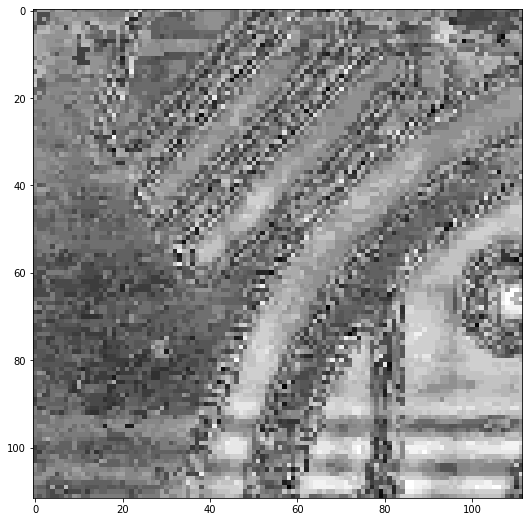

In [ ]:
crop_big = crop_big.reshape(112,112)
plt.imshow(crop_big, cmap='gray', interpolation='none')